<a href="https://colab.research.google.com/github/anebawk/DS_Projects/blob/main/USL_Project_LearnerNotebook_kwabena_dwaa_FullCode__f(2)_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# to supress scientific notations for the dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

### Loading the data and checking first few row of the data

In [ ]:
# reading the dataset
data=pd.read_csv("/content/stock_data.csv")
data.sample(n=10,random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000,-15.478,2.924,205,70,830000000,-14454000000,-35.550,406582278.500,93.089,1.786
125,FB,Facebook,Information Technology,Internet Software & Services,104.660,16.224,1.321,8,958,592000000,3669000000,1.310,2800763359.000,79.893,5.884
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.030,7.579,1.163,15,47,21818000,248710000,1.520,163625000.000,26.336,-1.269
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410,10.661,0.806,17,129,160383000,636056000,3.280,491391569.000,24.070,-2.257
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610,0.865,1.590,32,64,-588000000,-7829000000,-10.230,765298142.700,93.089,3.345
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516,-8.699,1.479,142,27,159000000,1293000000,2.970,435353535.400,17.682,-3.838
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130,-21.254,2.365,2,201,523803000,85171000,0.560,152091071.400,93.089,9.568
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040,-5.102,1.966,4,189,7786000000,-671000000,-0.790,849367088.600,93.089,17.346
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.620,3.654,1.160,20,99,2288000000,2297000000,5.140,446887159.500,10.432,-0.376
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480,7.067,1.581,12,67,412000000,968100000,2.260,428362831.900,14.814,4.219


Data has loaded succesfully and in accordance with data dictionary.

### Checking the shape of the data


In [ ]:
data.shape

(340, 15)

* The data set has 340 rows and 14 columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

* There are 13 numeric data type, 2 object type data  and a memory usage of 40KB


### Creating a copy of the data

In [ ]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Checking for duplicates and missing values

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

*There are no duplicates and missing values in the dataset

### Statistical summary of the dataset

### Let's check the statistical summary of the data

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.000,80.862,98.055,4.500,38.555,59.705,92.880,1274.950
Price Change,340.000,4.078,12.006,-47.130,-0.939,4.820,10.695,55.052
Volatility,340.000,1.526,0.592,0.733,1.135,1.386,1.696,4.580
ROE,340.000,39.597,96.548,1.000,9.750,15.000,27.000,917.000
Cash Ratio,340.000,70.024,90.421,0.000,18.000,47.000,99.000,958.000
Net Cash Flow,340.000,55537620.588,1946365312.176,-11208000000.000,-193906500.000,2098000.000,169810750.000,20764000000.000
Net Income,340.000,1494384602.941,3940150279.328,-23528000000.000,352301250.000,707336000.000,1899000000.000,24442000000.000
Earnings Per Share,340.000,2.777,6.588,-61.200,1.558,2.895,4.620,50.090
Estimated Shares Outstanding,340.000,577028337.754,845849595.418,27672156.860,158848216.100,309675137.800,573117457.325,6159292035.000
P/E Ratio,340.000,32.613,44.349,2.935,15.045,20.820,31.765,528.039


Observations
* Current Price ranges from 4.5 dollars to 1,275 dollars with and average of 80.86 dollars.
* Average Price Change is 40.78 dollars with -47 dollars and 4.55 as minimum and maximum respectively.
* Average volatility is 1.52, that of ROE is 39.56  whiles  average cash ratio is 70.02
* Net cash flow ranges from - 11.2B dollars to 20.7B with 55.5m as average.
* Net income is 1.5B on the average.
*  Earning per share ranges from -61 dollars to 50 dollars with average of 2.78 dollars.
*  Estimated Outstanding Shares has an average of 57.7M dollars
*  P/E ranges from 2.94 to 528 with an average of 32.61
*  B/P ratio has an average of -1.72

## Exploratory Data Analysis

### Univariate analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

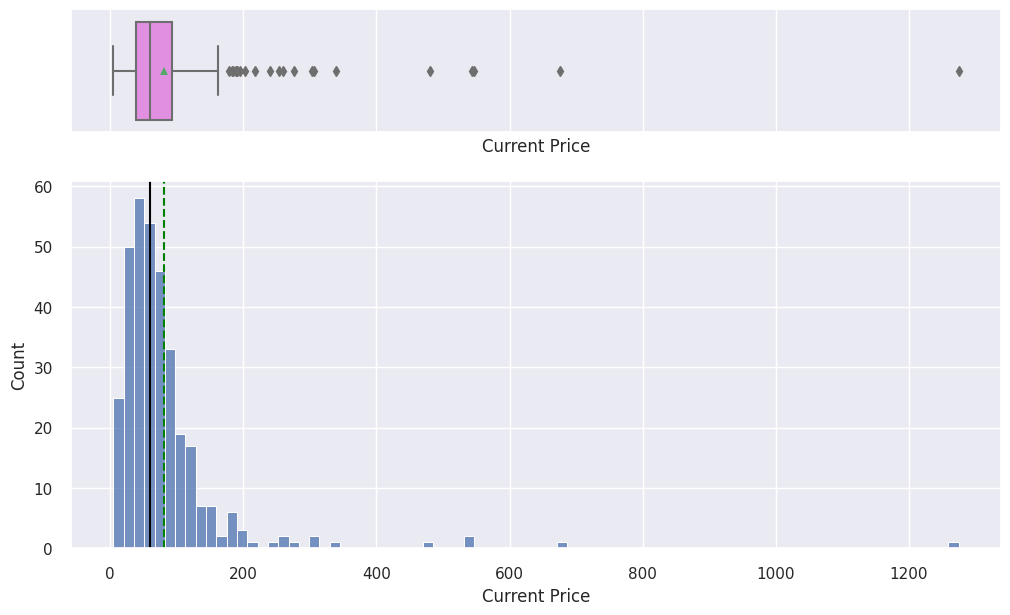

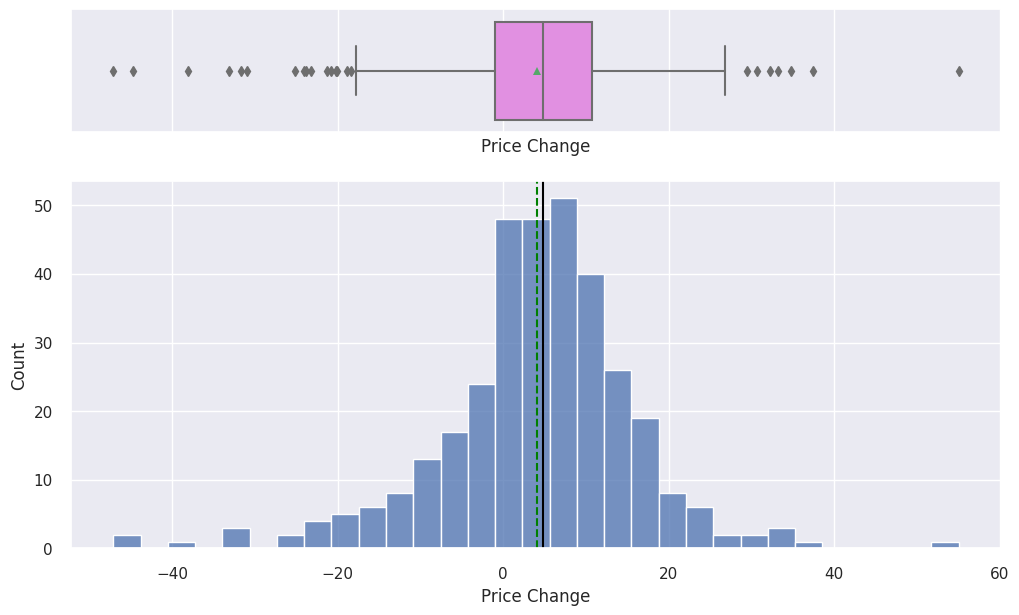

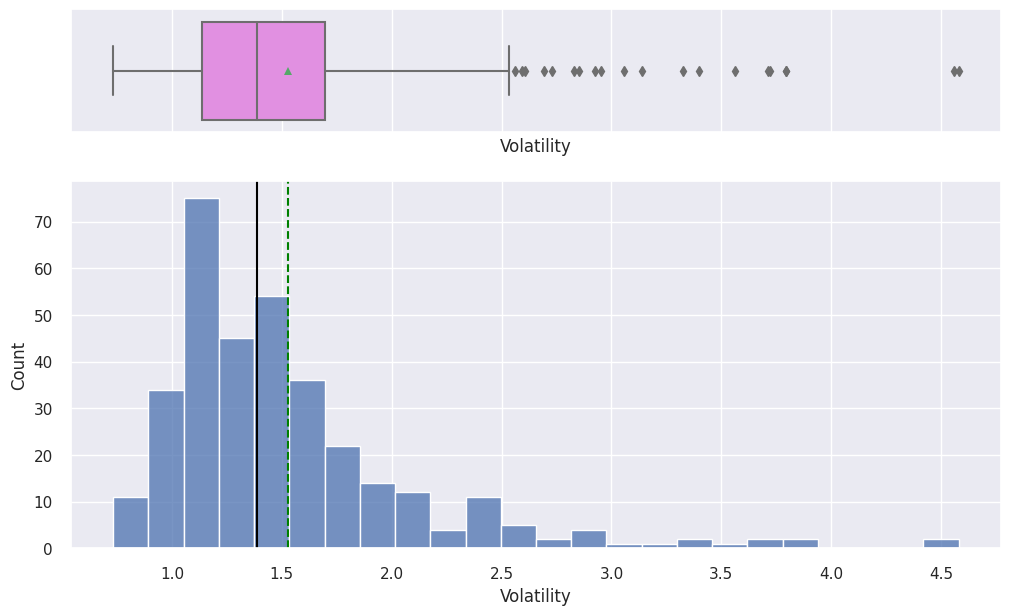

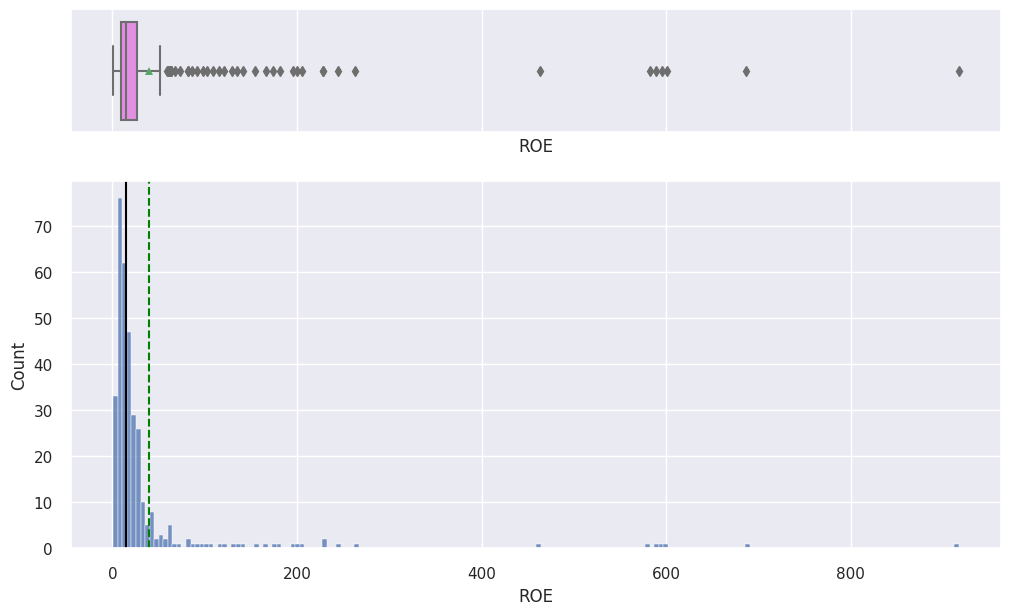

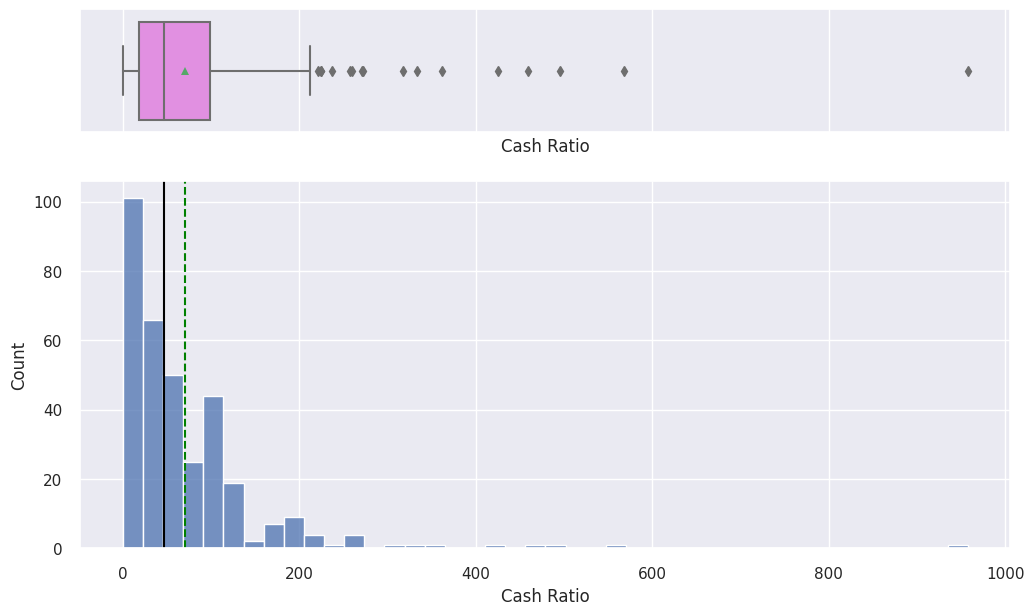

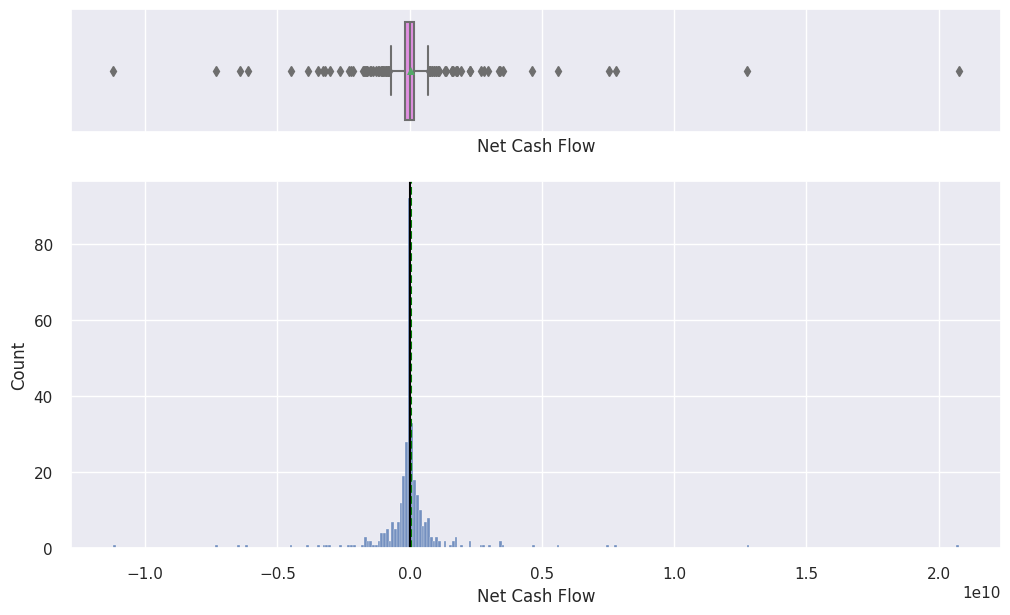

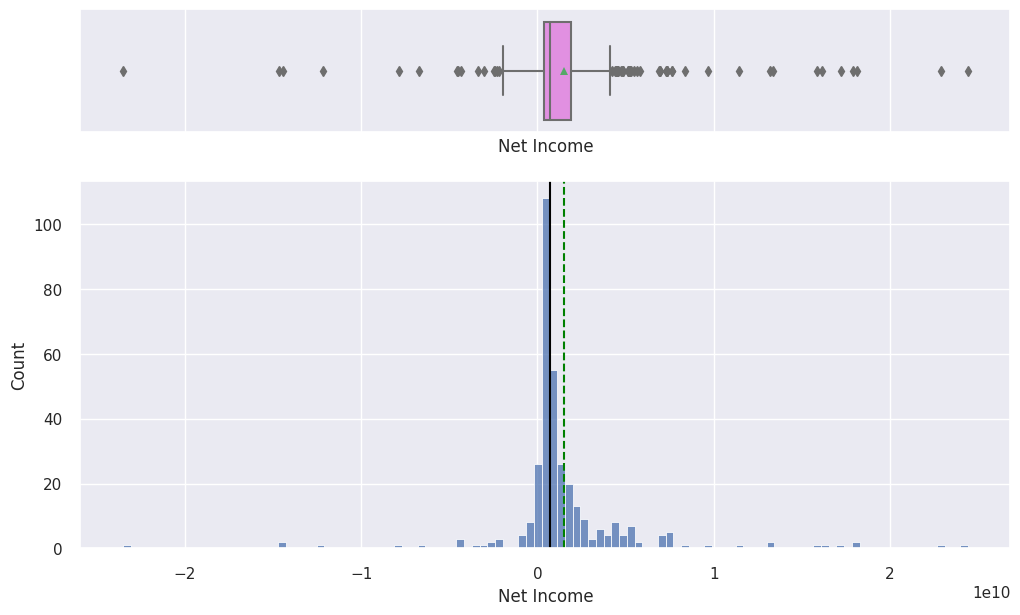

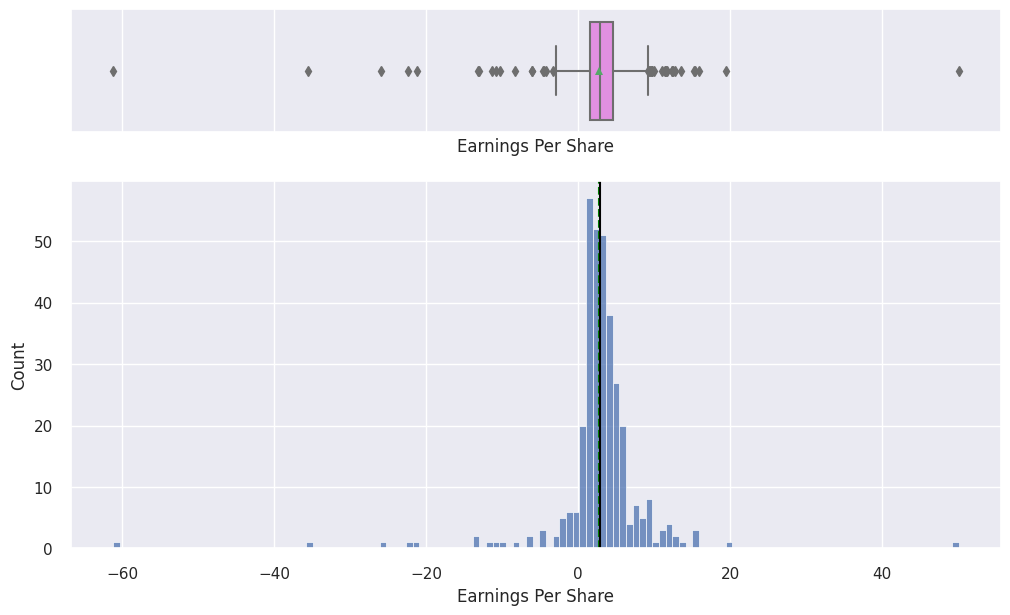

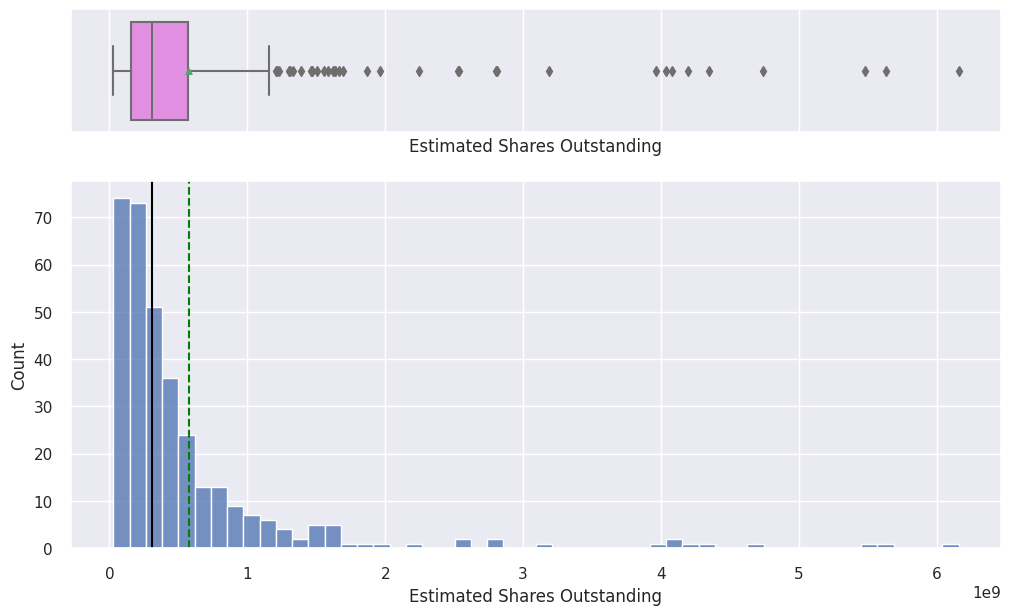

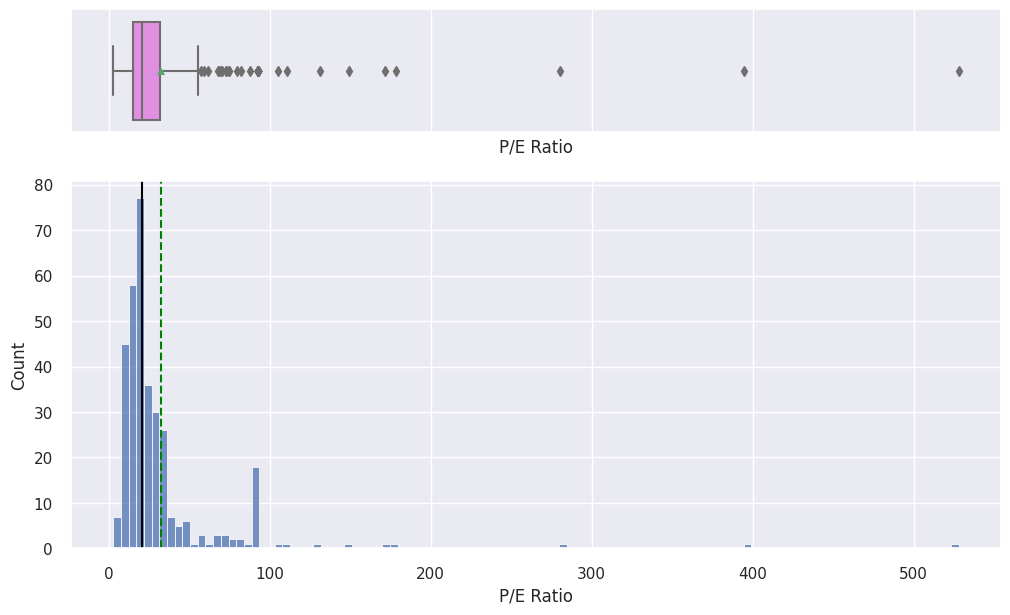

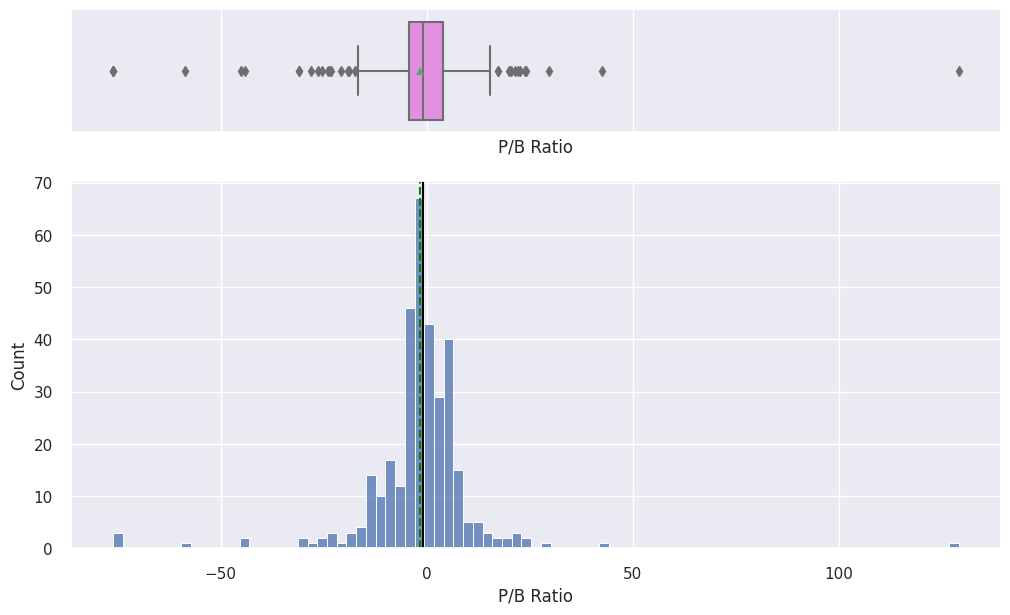

In [ ]:
# make a list of numerical variabless
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item, figsize=(12, 7), kde=False, bins=None)


* Current Price is a right skewed distribution with outliers and extreme values indicating securities with very high current prices.
* The distribution of Price Change looks normal with outliers and extreme values on both the lower and upper sides which indicate both positive and negative price changes.
* Volatility is right skewed with outliers on and extreme values which may indicates shares with very high volatility.
* ROE is heavily right skewed with a lot of outliers and some extreme values which indicate securities with very high ROE.
* Cash Ratio is also right skewed and there are outliers present.
* Net Cash Flow represent a normal distribution with outliers on both sides.
* Net income has an almost normal distribution with outliers at both sides.
* Just like Cash ratio the distribution of Earnings per share is almost normal with the presences of outliers on both sides as well extreme value.
*  Estimated Shares Outstanding is right skewed with outliers and some extreme value which indicates securities with very high estimated outstanding shares.
* Similar to Estimated shares outstanding, P/E ratio is also right skewed with outliers and some extreme values.
* B/P ratio is a normal distribution with outliers on both sides

`GICS Sector`

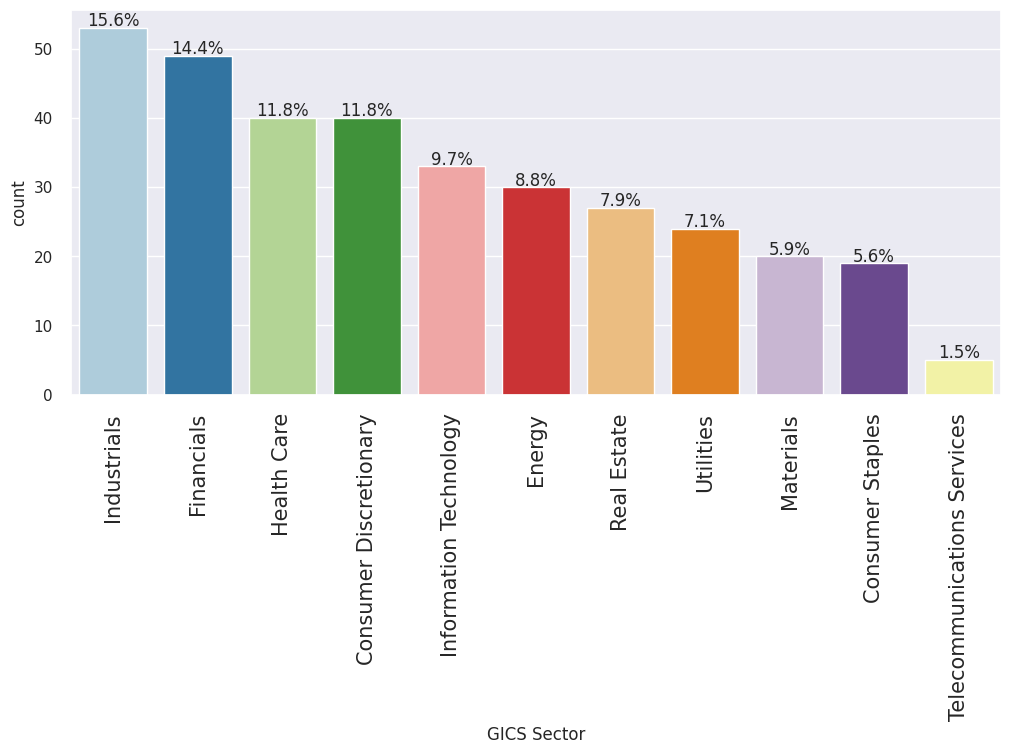

In [ ]:
# let's explore GICS Sector.
labeled_barplot(df, "GICS Sector", perc=True)

Observations
* Top three Sectors with most securities are Industrials, accounting for 15.6% followed by Financials sector with 14.4% and Health Care with 11.8%.

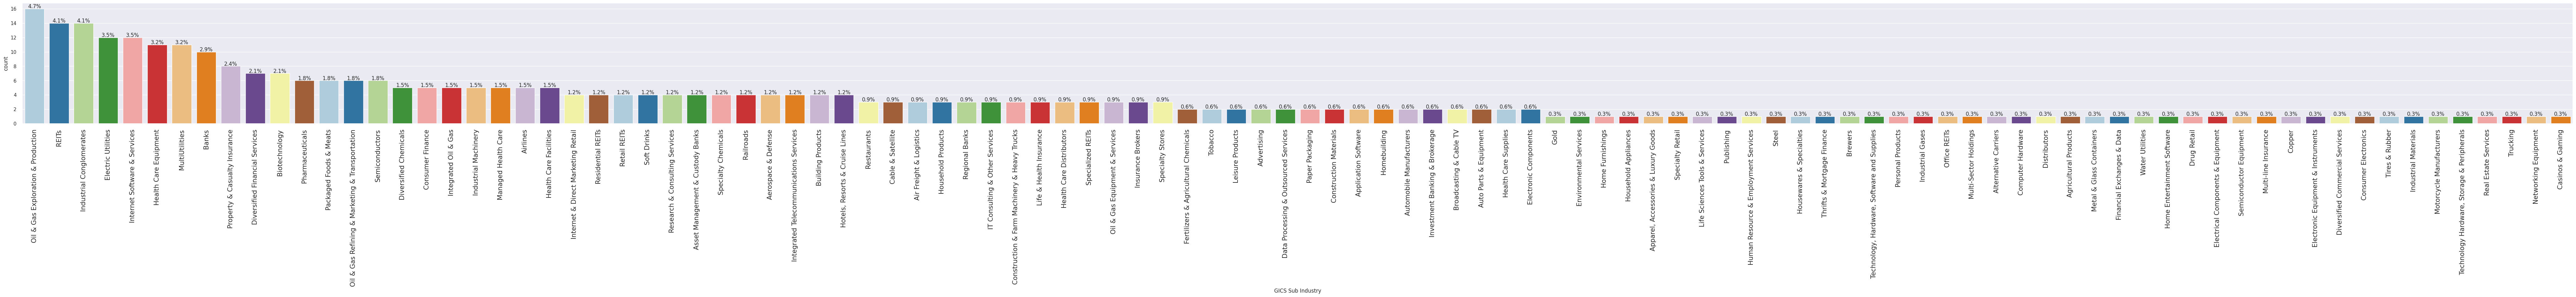

In [ ]:
# let's explore GICS Sub Industry.
labeled_barplot(df, "GICS Sub Industry", perc=True)

Observations
* Top 5 sub industries are follows;
  *  Oil & Gas Exploration & Production accounting for 4.7%
  * REITs and Industrial Conglomerates follows with 4.1% each.
  * Next is Electric Utilities and and Internet Software & Services

### Bivariate Analysis

<Axes: >

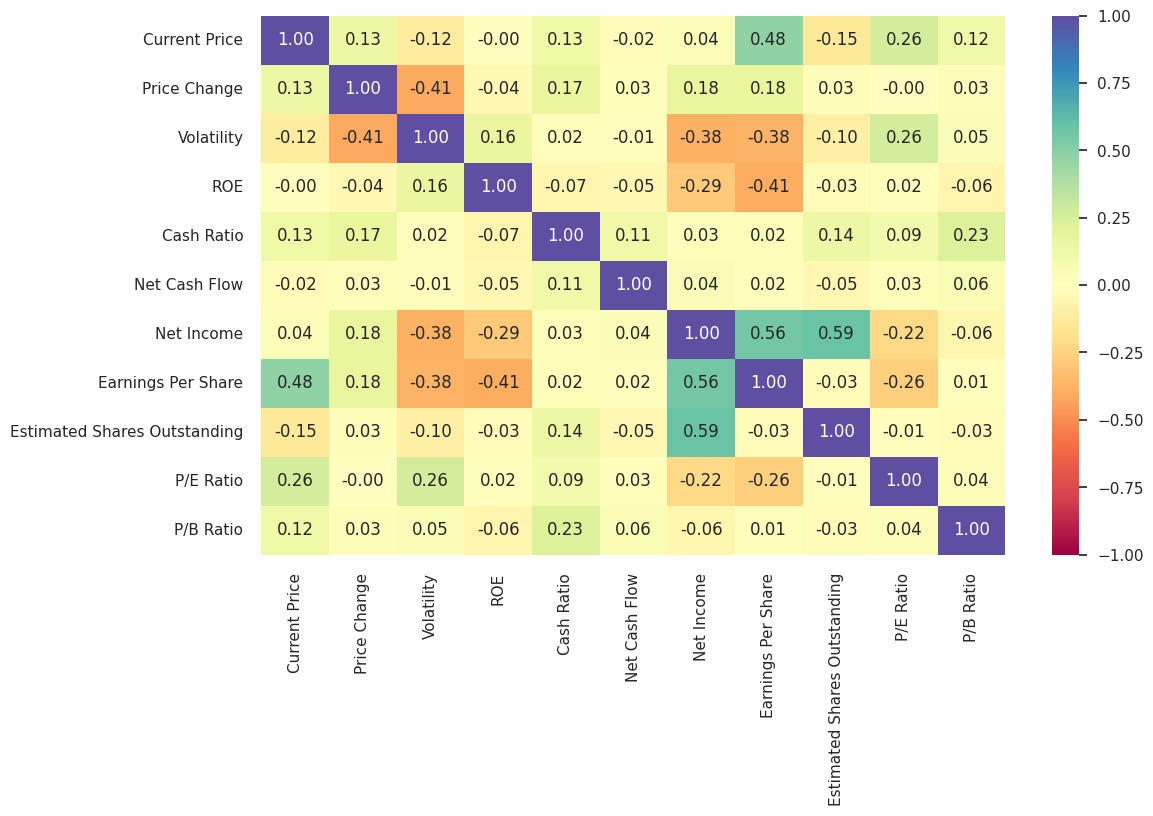

In [ ]:
# let't check the correlationn among variable
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

* There are moderate positive correlations between Net income and Earning per share as well  as Estimated Shares Outstanding.
* There are no strong correlations among the remaining features

`economic sector vs Price Changes`

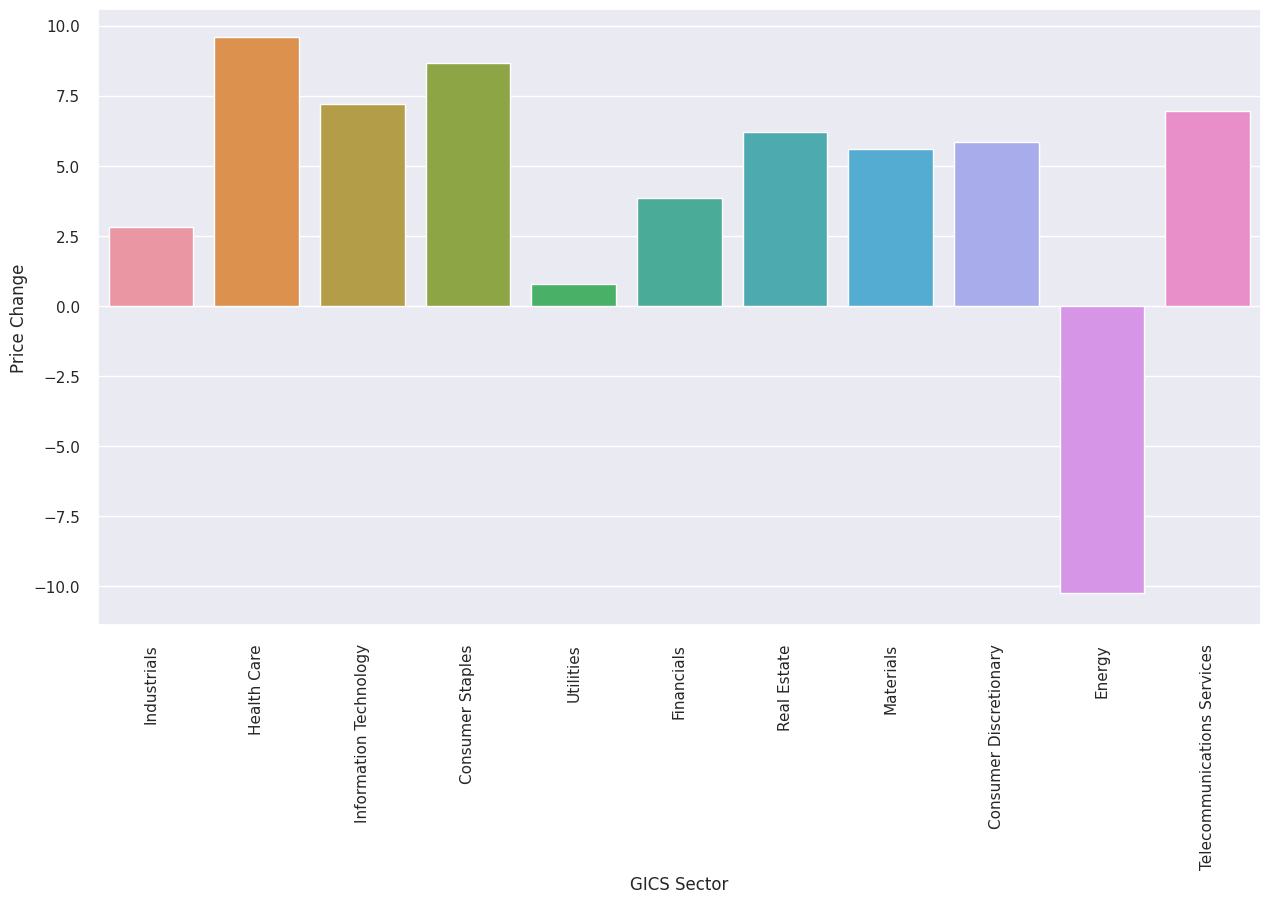

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x="GICS Sector", y="Price Change", ci=False)
plt.xticks(rotation=90)
plt.show()

* The economic sectors with the highest Price Change is Health Care with almost 10 dollars change in price. this is followed by Consumer Staples with around 8.5 dollars increase and Information Technology with an increase of around 7.5 dollars.
* Energy Sector decrease in price by 10 dollars.

`economic sector vs Cash ratio`

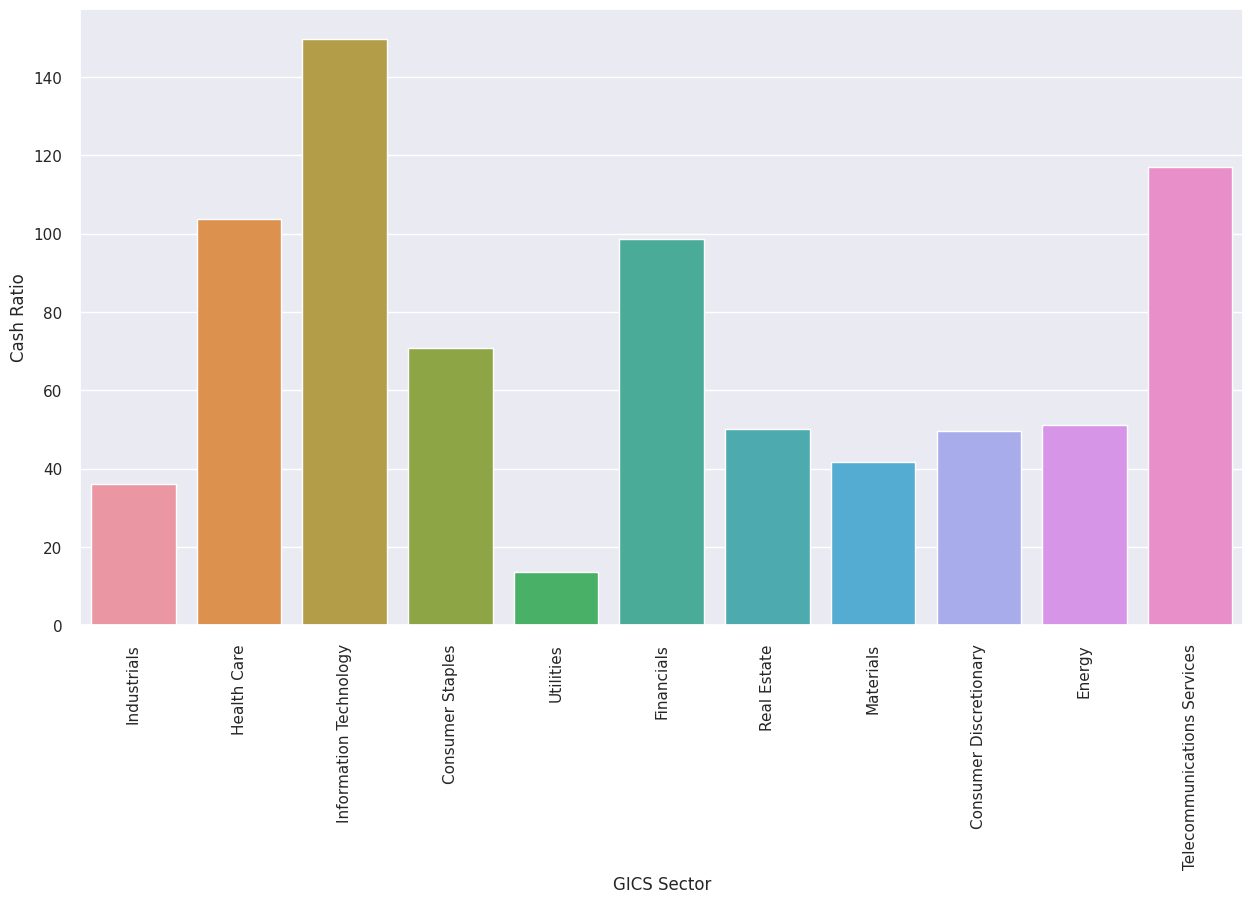

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x="GICS Sector", y="Cash Ratio", ci=False)
plt.xticks(rotation=90)
plt.show()

The Economic sector with the highest cash ratio is Information Technology with a ratio of around 150. This is followed by Telecommunications Services with around 120 and Health care with a little over 100.

`economic sector vs P/E ratio`

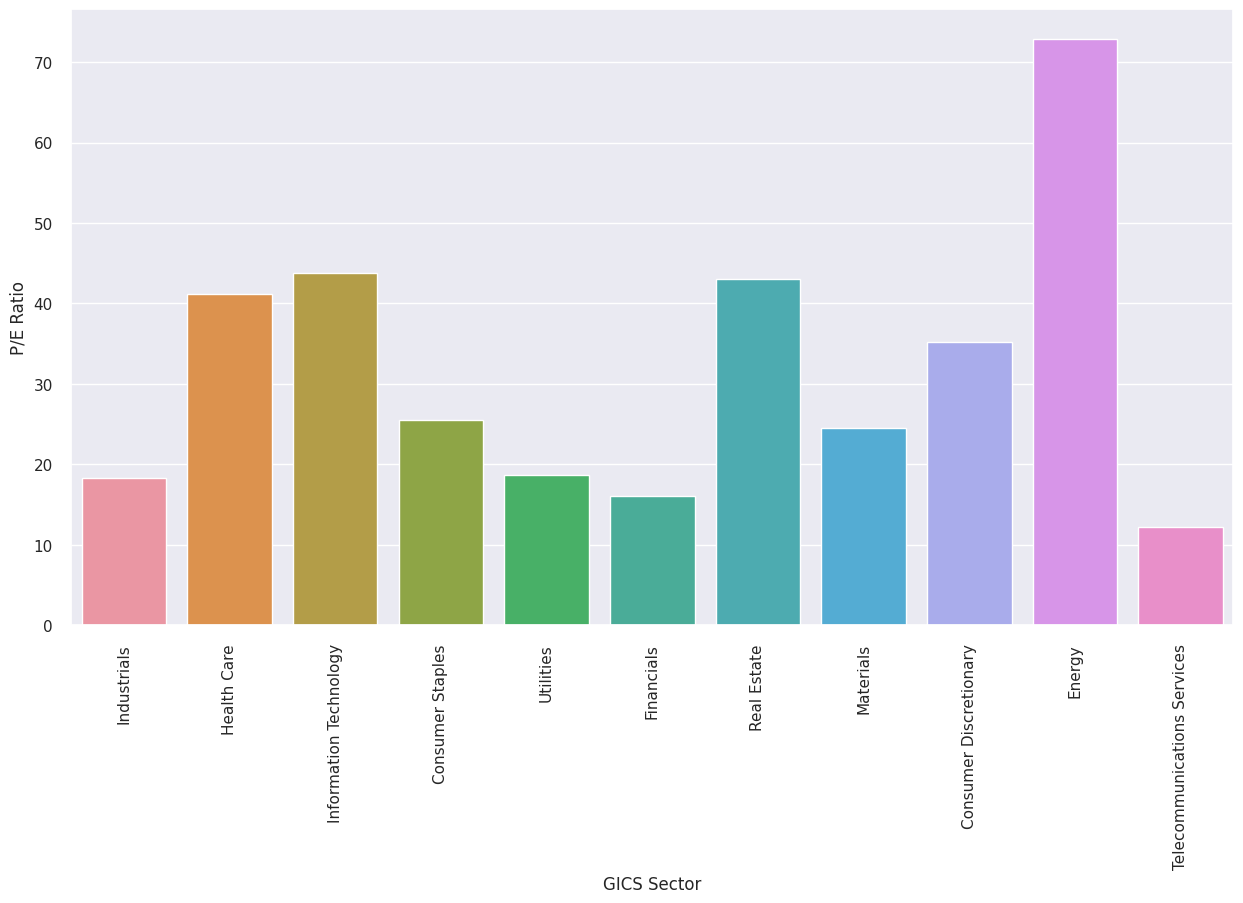

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x="GICS Sector", y="P/E Ratio", ci=False)
plt.xticks(rotation=90)
plt.show()

* Economic sector with the highest P/E ration is Energy sector with 70 as it P/E ratio. This followed by Real Estate with and Information Technology with a litle above 40 each and Health Care with 40 P/E ratio.

## Data Preprocessing
### Outlier Chcek
  * Let's plot boxplots of all numeric columns to check for outliers

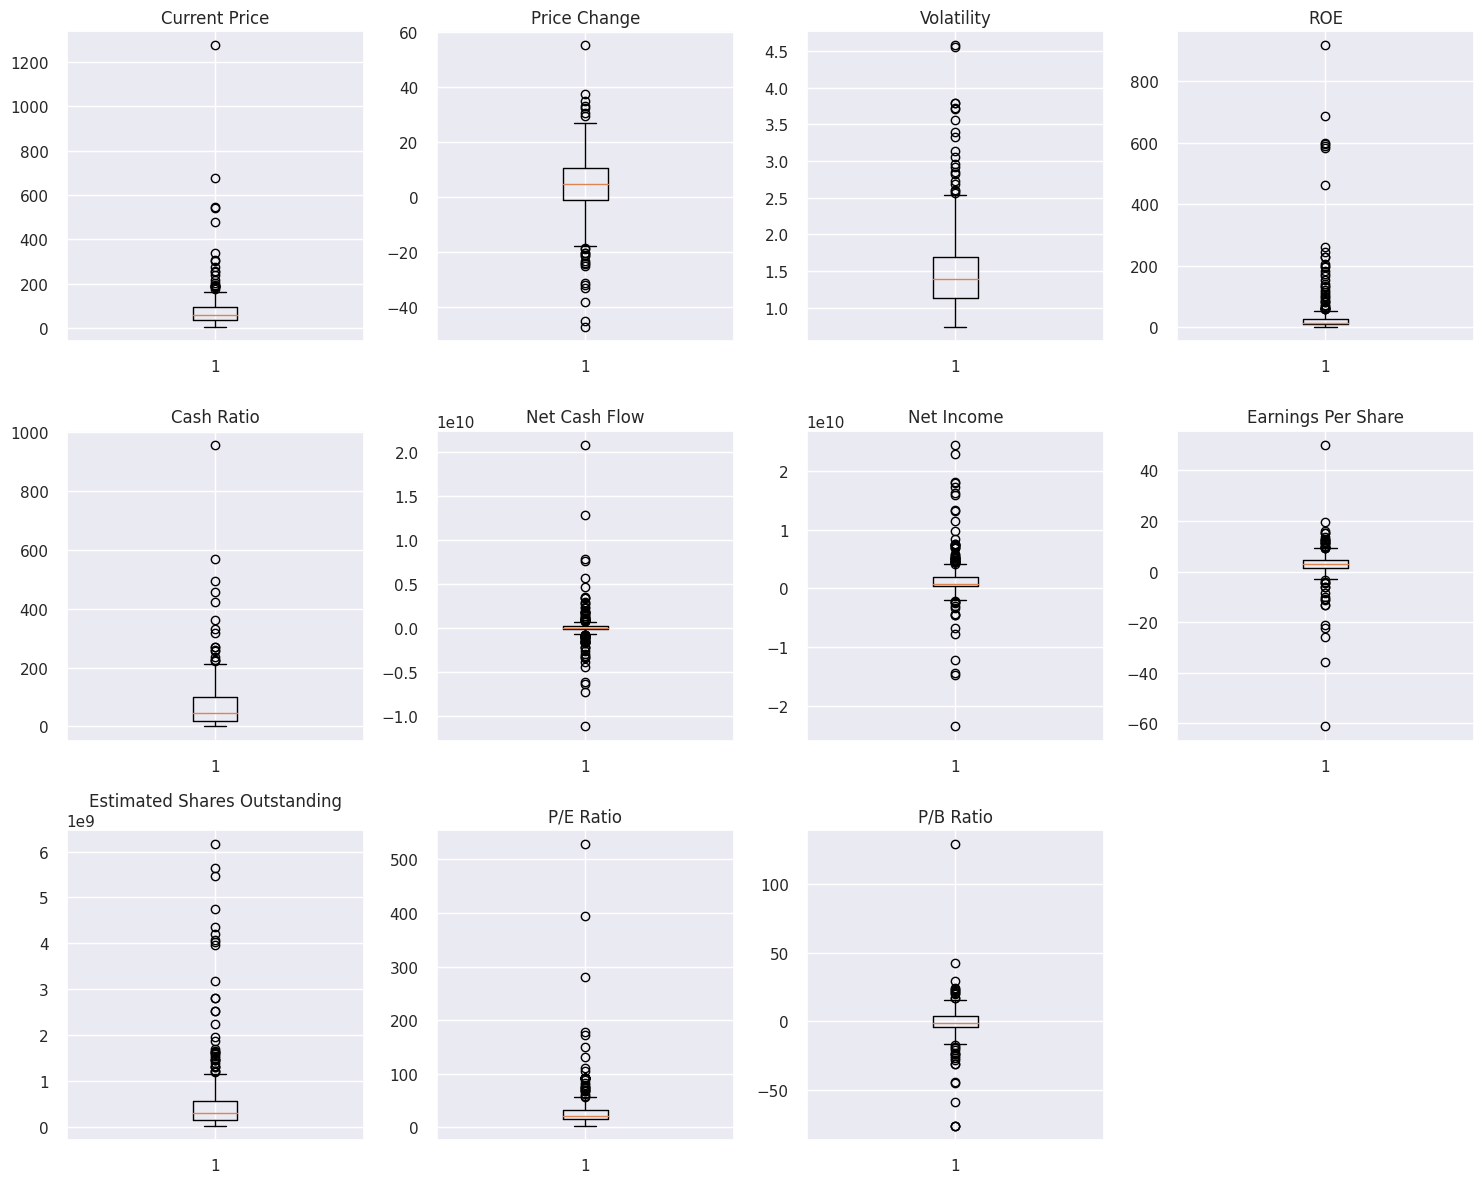

In [ ]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* The are outliers in all of the variables but we will not treat them since they represent real values in the dataset.

### Scaling
  * Let's scale the data before we proceed with clustering

In [ ]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# Let's create a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## EDA

- It is a good idea to explore the data once again after manipulating it.

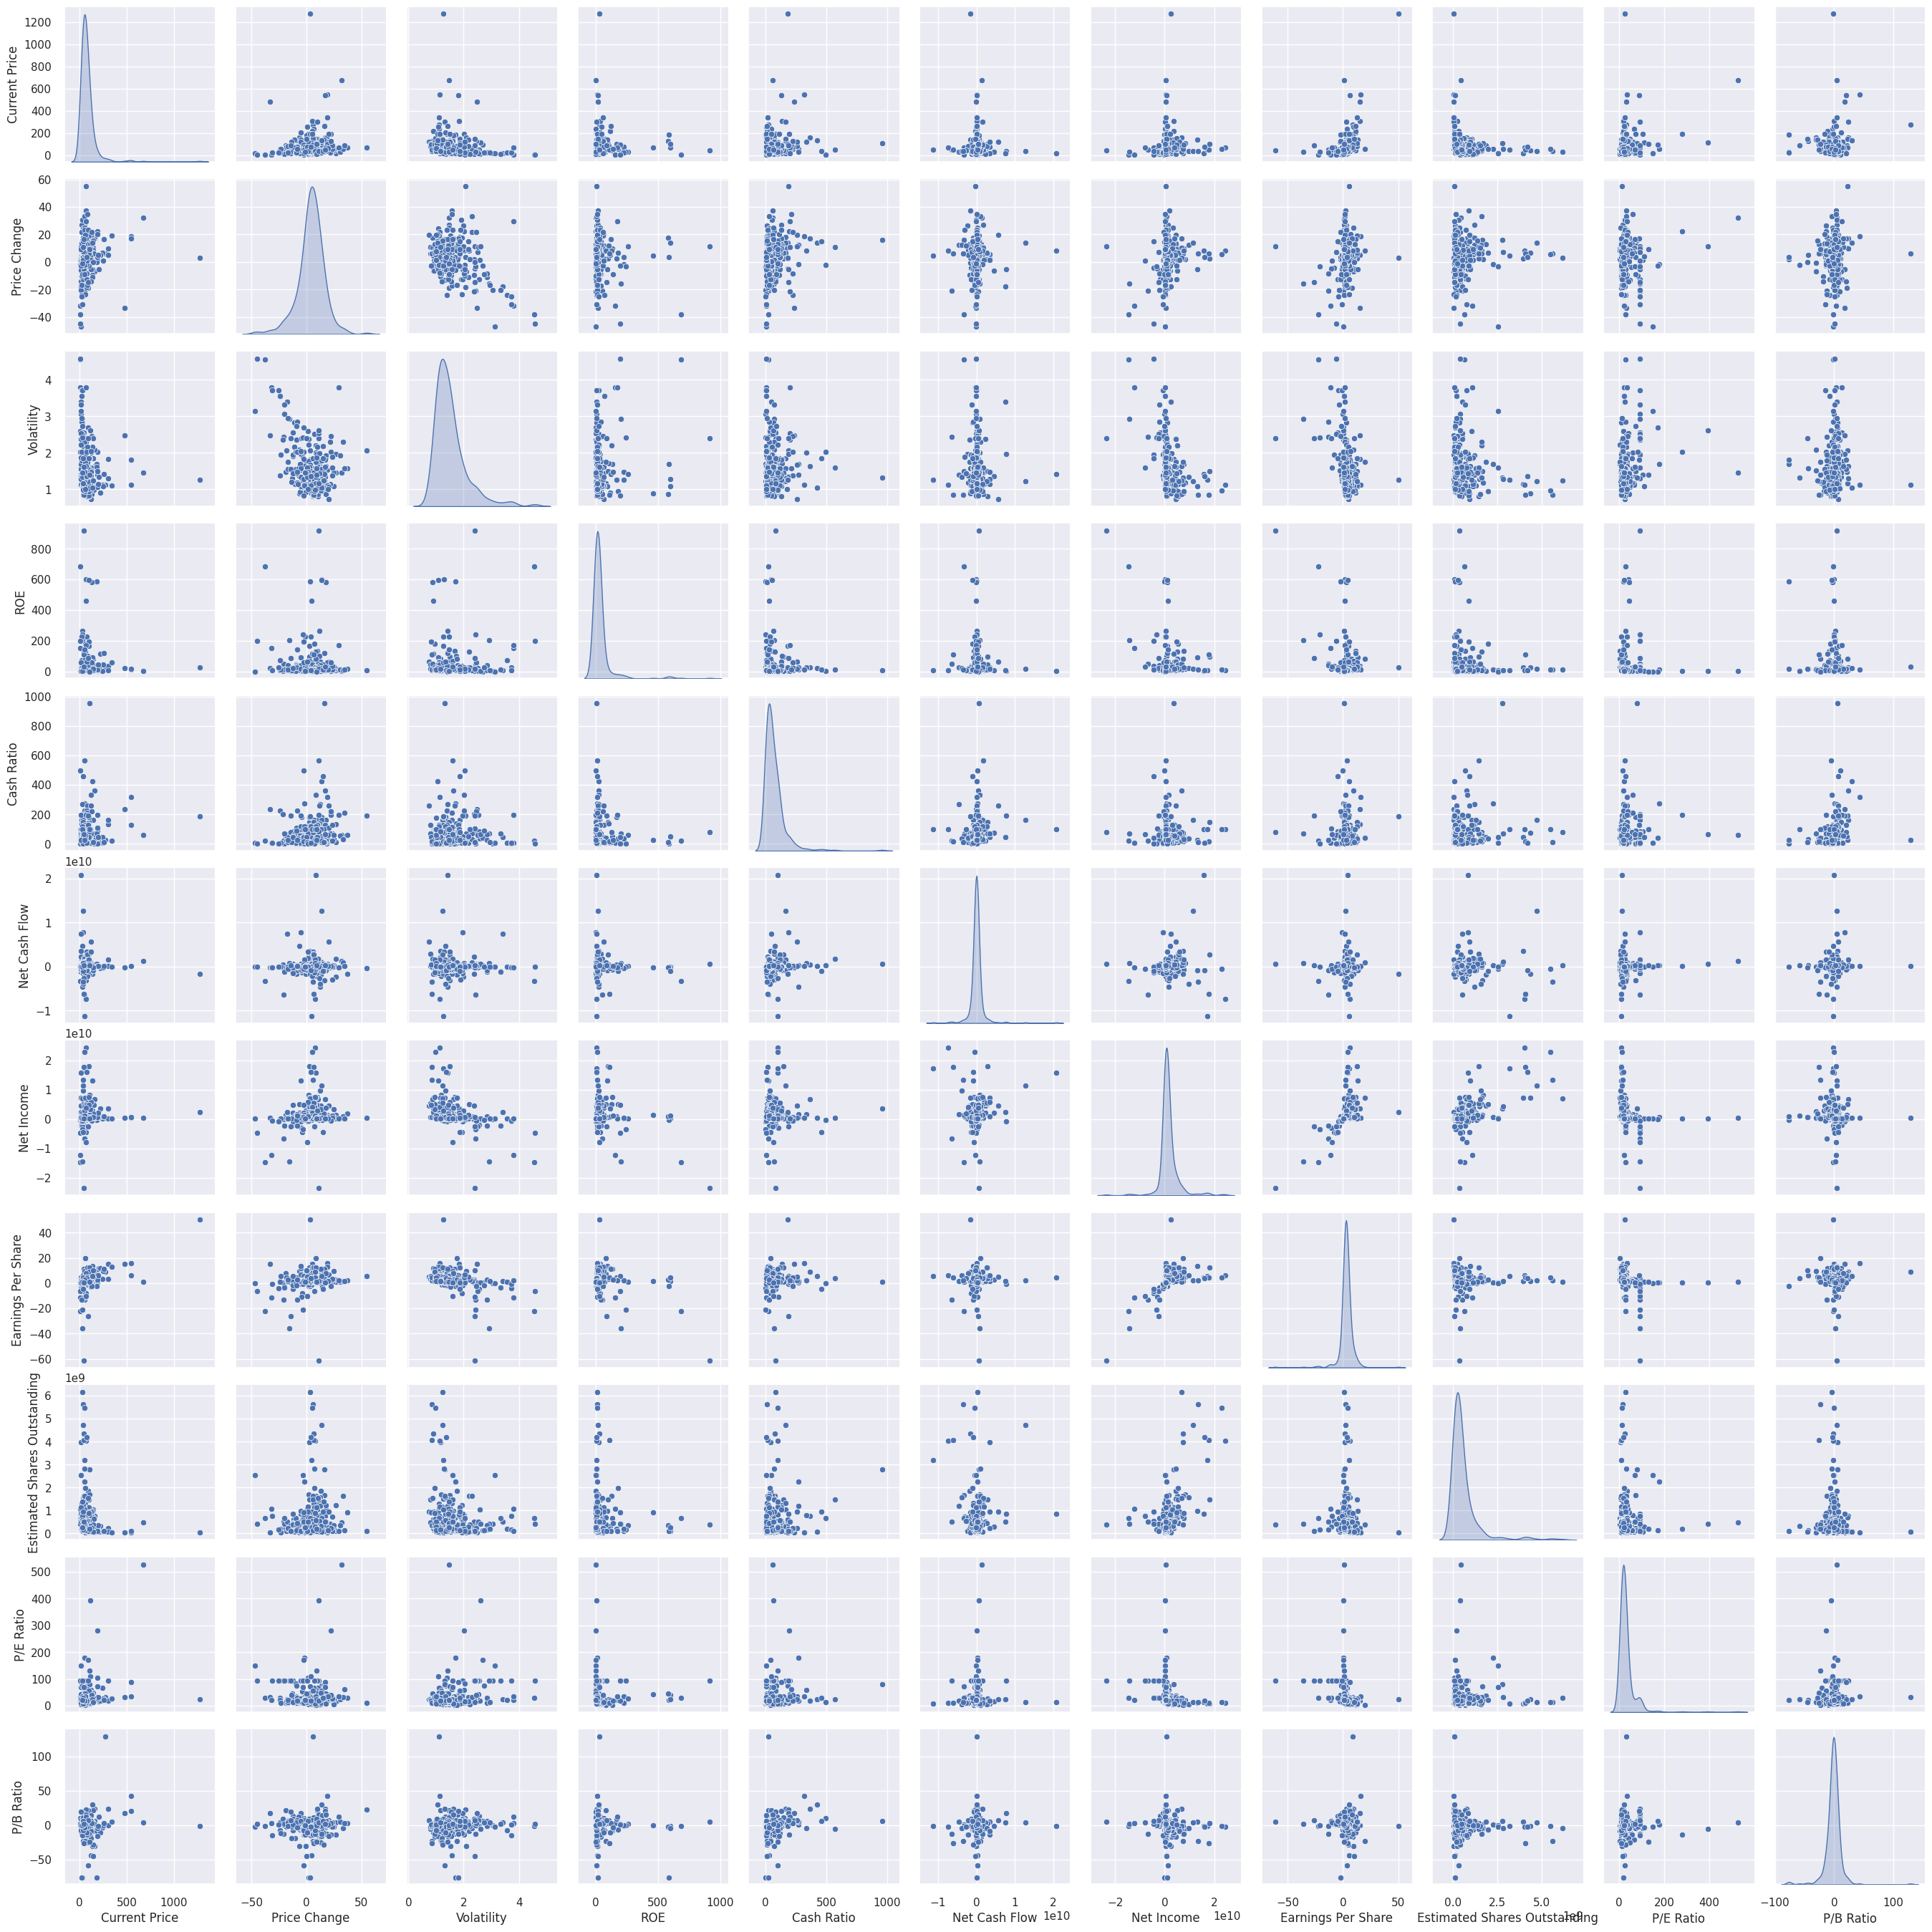

In [ ]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

## K-means Clustering

### Checking the Elbow Plot

In [ ]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.268294808035244
Number of Clusters: 4 	Average Distortion: 2.179645269703779
Number of Clusters: 5 	Average Distortion: 2.107108370017741
Number of Clusters: 6 	Average Distortion: 2.0591390368681237
Number of Clusters: 7 	Average Distortion: 2.0082604624616076
Number of Clusters: 8 	Average Distortion: 1.9732765706544542
Number of Clusters: 9 	Average Distortion: 1.931608240986766
Number of Clusters: 10 	Average Distortion: 1.8892215293623766
Number of Clusters: 11 	Average Distortion: 1.8234472704896982
Number of Clusters: 12 	Average Distortion: 1.7662154515618116
Number of Clusters: 13 	Average Distortion: 1.7596974309898805
Number of Clusters: 14 	Average Distortion: 1.6980893147050589


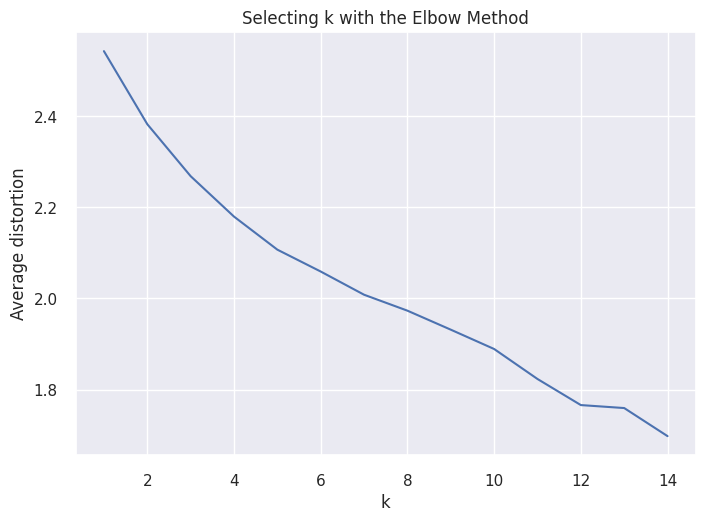

In [ ]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )
    meanDistortions.append(distortion)
    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

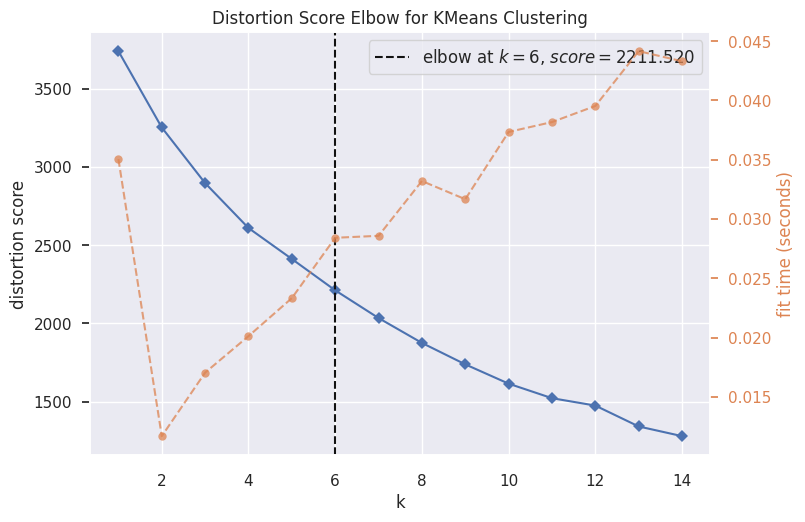

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=1)
visualizer =KElbowVisualizer(model, k=(1,15),timings=True)
visualizer.fit(k_means_df) # fit the data to the visualizer
visualizer.show()# finalize and render figure

* From the Elbow method 6 is the appropriate number of clusters

## Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


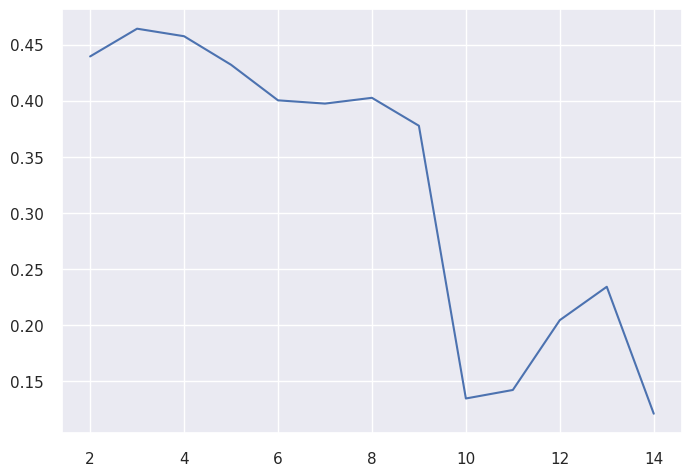

In [ ]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

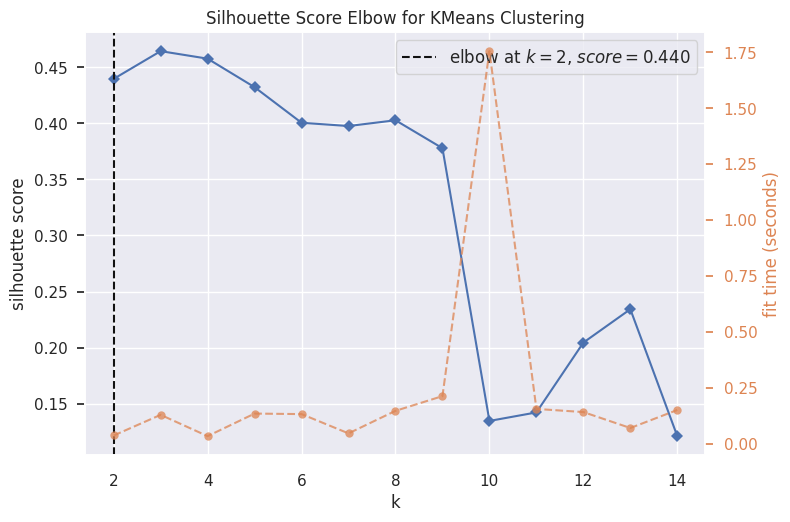

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)
visualizer.show()

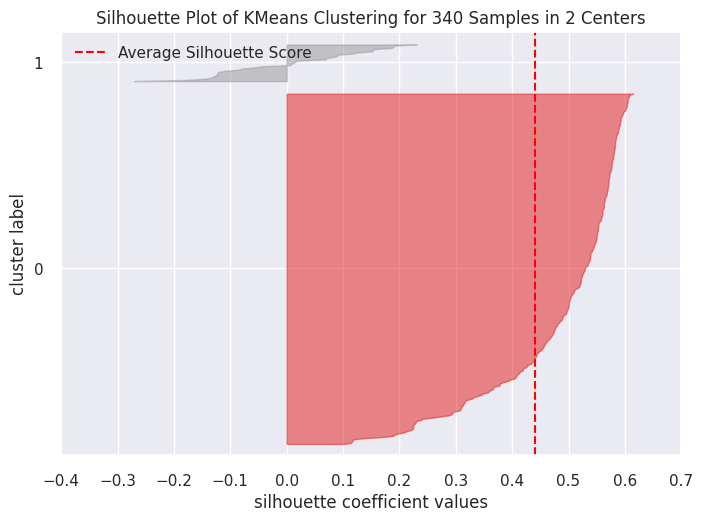

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
#finding optimal no. of clustter with
visualizer = SilhouetteVisualizer(KMeans(2,random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

* comparing the elbow method to the silhouette score we will proceed with elbow number of cluster of 6 since this will give much variability than silhouette score of 2 clusters

## Creating Final Model

In [ ]:
# final K-means model
kmeans=KMeans(n_clusters=6, random_state=1)
kmeans.fit(k_means_df)

KMeans(n_clusters=6, random_state=1)

In [ ]:
# creating a copy of the original data
df1=df.copy()
# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"]=kmeans.labels_

## Cluster Profile

In [ ]:
km_cluster_profile = df1.groupby("KM_segments").mean() # using groupby to create cluster labels

In [ ]:
km_cluster_profile["count_in_each_segment"]=(
    df1.groupby("KM_segments")["Security"].count().values
)

In [ ]:
km_cluster_profile.style.highlight_max(color='Red', axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,73.854019,5.116180,1.369515,35.262963,50.637037,4512725.925926,1512994744.444444,3.723870,430296731.305963,23.486573,-3.567829,270
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,111.612223,11.789464,1.787972,26.125000,290.083333,1450830291.666667,1499538625.000000,2.993750,700417074.282083,44.575135,13.972648,24
3,557.499989,17.445166,1.714325,12.000000,158.000000,116336500.000000,773142833.333333,12.396667,215235860.658333,225.136796,7.666157,6
4,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
5,34.231808,-15.515565,2.832069,48.037037,47.740741,-128651518.518519,-2444318518.518518,-6.284444,503031539.057037,75.627265,1.655990,27


In [ ]:
### Checking the companies in each cluster
for cl in df1["KM_segments"].unique():
  print("In cluster{}, the following companies are present:".format(cl))
  print(df1[df1["KM_segments"]==cl]["Security"].unique())
  print()

In cluster0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Archer-Daniels-Midland Co' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Activision Blizzard' 'AvalonBay Communities, Inc.'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'CBRE Group'
 'Crown Castle International Corp.' 'Car

In [ ]:
df1.groupby(["KM_segments", "GICS Sector"])["Security"].count()

KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          5
             Financials                     45
             Health Care                    30
             Industrials                    51
             Information Technology         20
             Materials                      17
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     2
             Information Technology          1
             Telecommunications Services     2
2            Consumer Discretionary          4
             Consumer Staples                1
             Energy

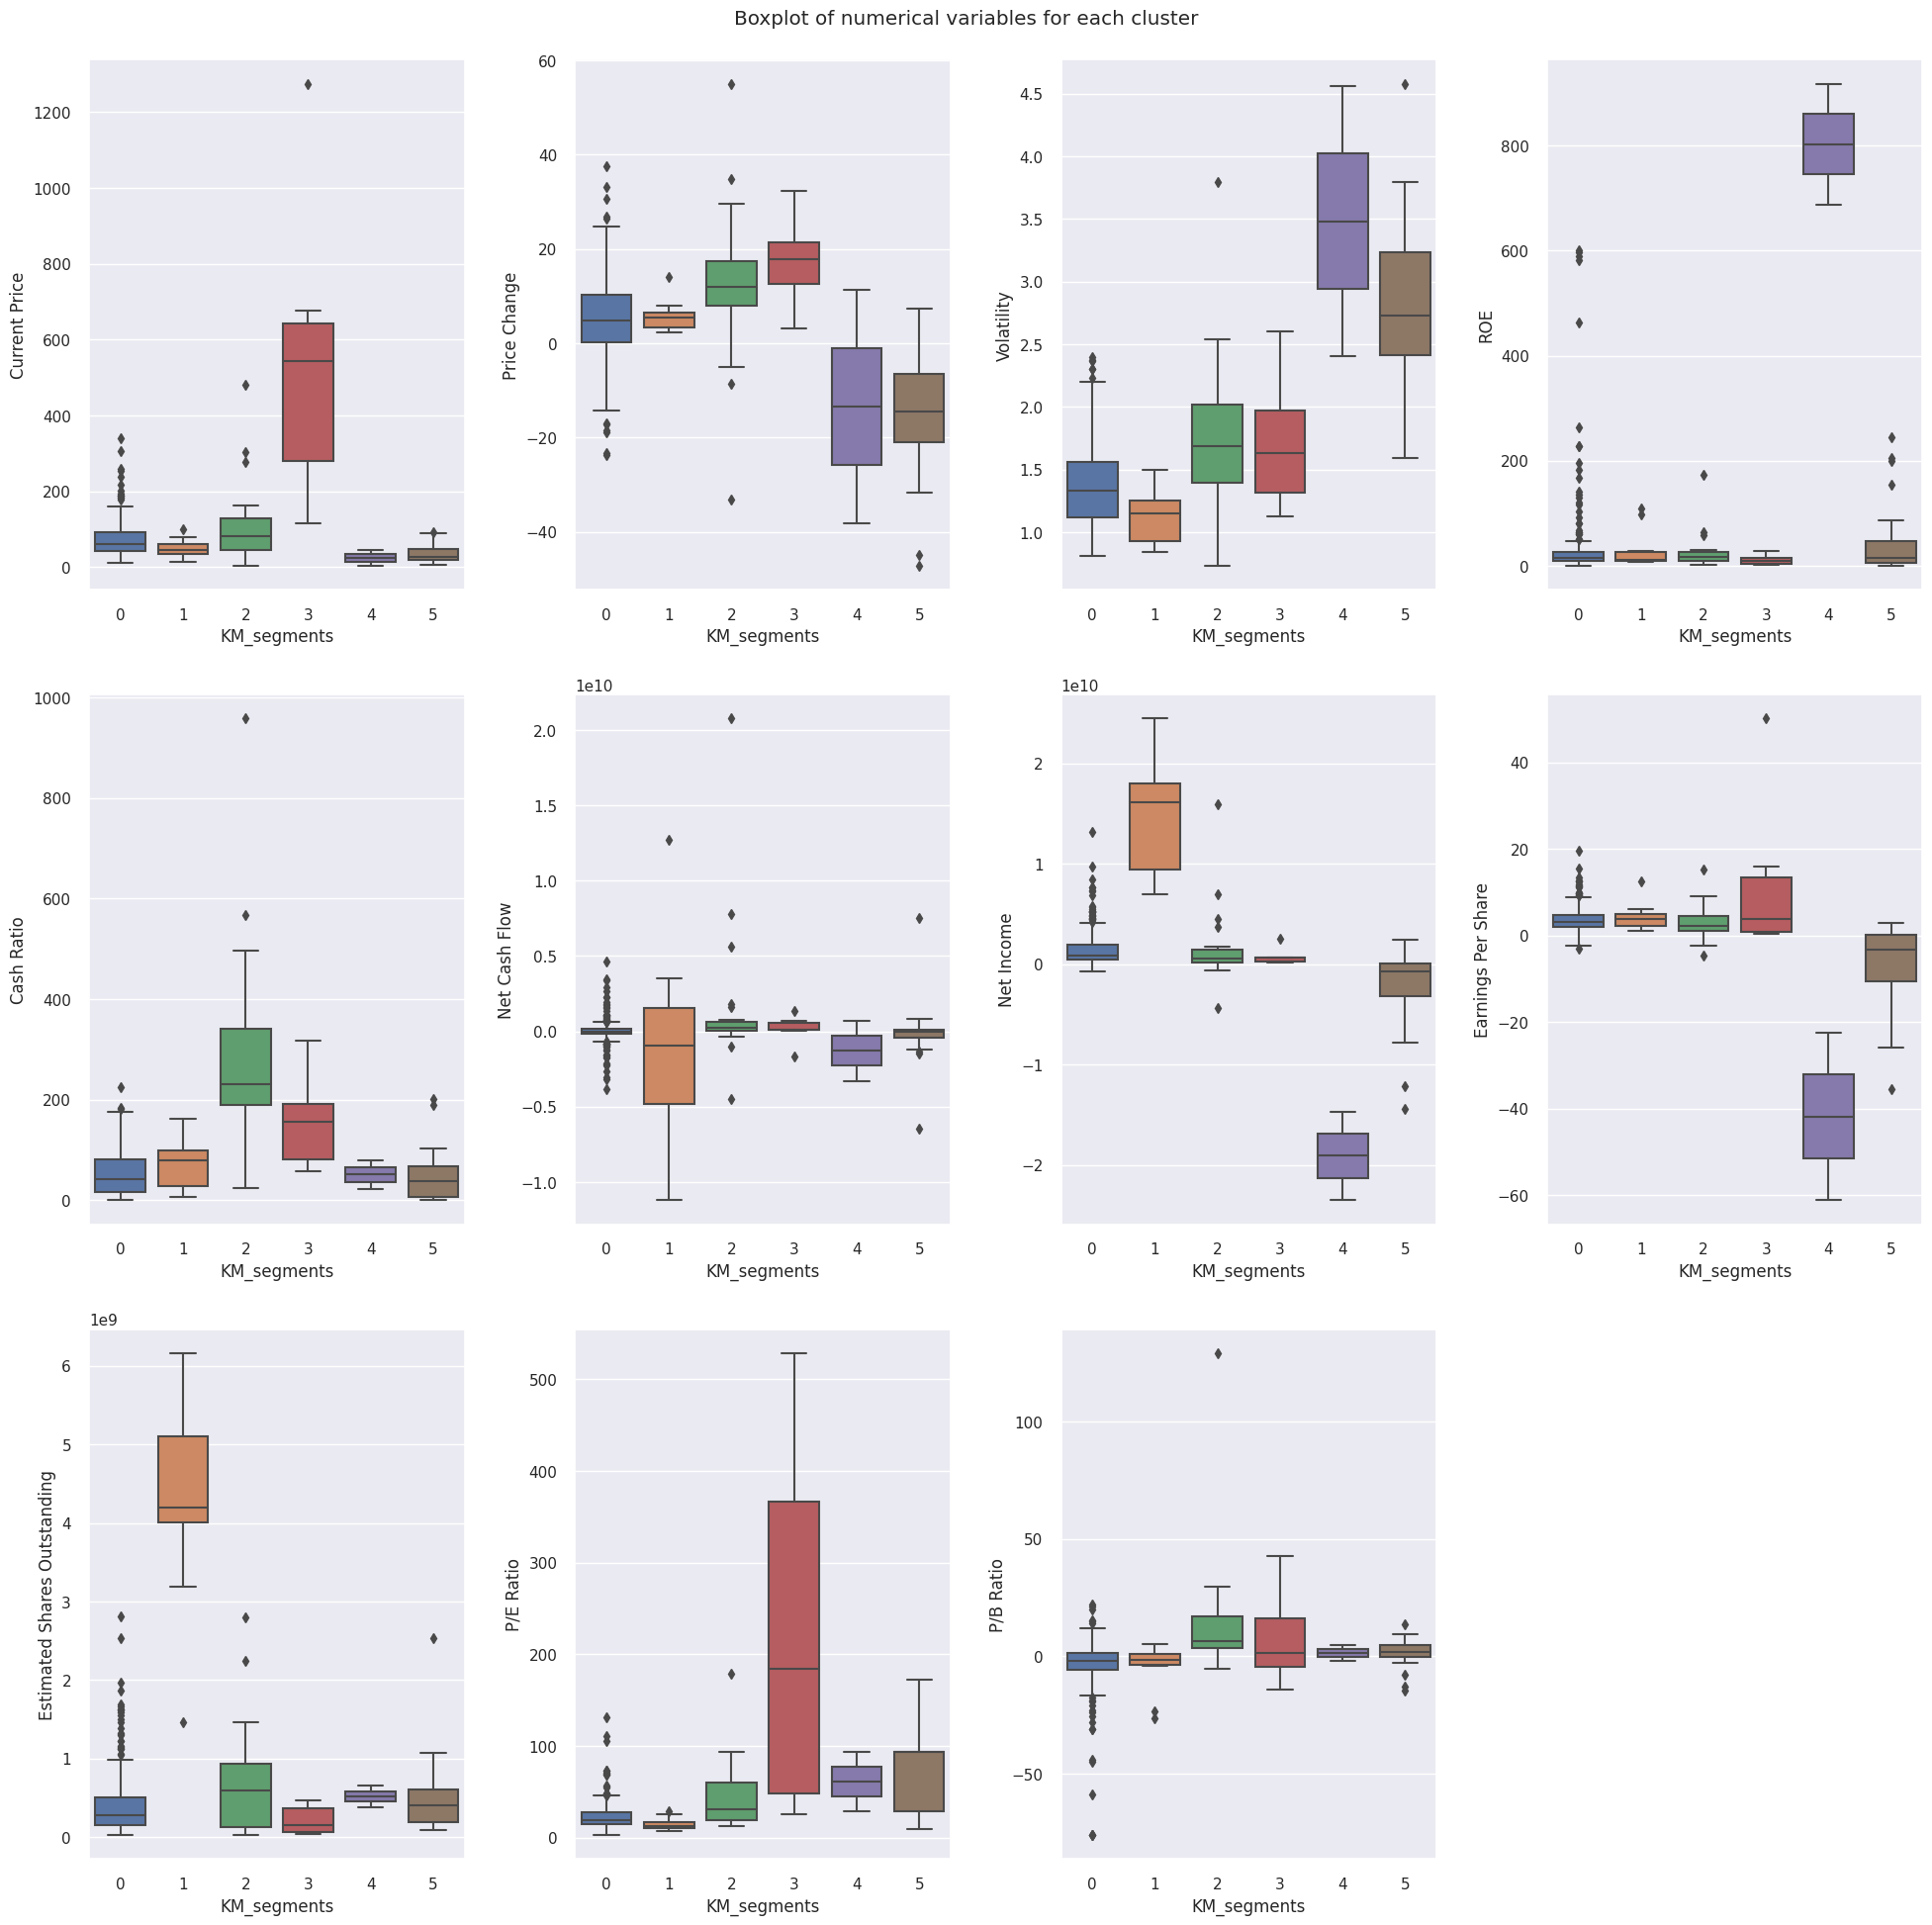

In [ ]:
plt.figure(figsize=(20,20))
plt.suptitle("Boxplot of numerical variables for each cluster")
for i, variable in enumerate(num_col):
  plt.subplot(3, 4, i + 1)
  sns.boxplot(data=df1, x= "KM_segments", y=variable)

plt.tight_layout(pad=2.0)

## Insights

* Cluster 0
  * There are  270 companies in this cluster
  * Volatility, P/E ratio and P/B ratio are low for companies in this cluster.
  * Price change, Cash Ratio, Net Cash flow,  Earnings per Share and Estimated outstanding share are low to moderate in this cluster.
  * Current Price and ROE are moderate for companies in cluster 0
  *  Net Income is moderate to high


* Cluster 1
  * There are 11 companies in this cluster
  * In this cluster, volatility, net cash flow P/E ration and P/B ratios are low.
  * Current Price ,Price Changes and Cash ratios  are low to moderate
  * ROE and Earnings per share are moderate
  * Net Income and Estimated outstanding share are very high

* Cluster 2
  * There are 24 companies in this cluster.
cluster 2 has low earnings per share
  * Volatility, ROE, Estimated Outstanding Share are low to moderate for this cluster
  * Current Price an Net Income are moderate
  * Price change and P/E ration are moderate to high
  * Cash ratio, Net cash flow and P/B ratios are high for cluster 2

* Cluster 3
  * There are 6 companies in cluster 3
  * ROE and Estimated Outstanding Shares are low in this cluster.
  * Volatility, Net income and P/B rations are moderate.
  * Cash ratio and Net cash flow are moderate to high.
  * Current Price, Price change, Earnings per share and P/E ratios are high in this cluster

* Cluster 4.
  * There are only two companies in this cluster.
  * Current price, Price change, Net cash flow, Net income are Earning per share are low for companies in this cluster
  * Cash ratio and Estimated Share Outstanding are low to moderate
  * P/E and P/B ratios are moderate for this cluster
  * Volatility and ROE are high for this Cluster

* Cluster 5
  * There are 27 companies in this cluster
  * ROE and P/E ratio  moderate this cluster
  * Volatility , Estimated outstanding shares and P/B ratio are  low to moderate.
  * The remaining feature are low for this cluster.

## Hierarchical Clustering
  ### Computing Cophenetic Correlation

In [ ]:
hc_df = subset_scaled_df.copy()

In [ ]:
# listing of distance matrics
distance_metrics = ["euclidean","chebyshev","mahalanobis","cityblock"]

# list of linkage methods
linkage_methods=["single", "complete","average","weighted"]

high_cophenet_corr = 0
high_dm_lm = [0,0]
for dm in distance_metrics:
  for lm in linkage_methods:
    Z = linkage(hc_df, metric=dm, method=lm)
    c, coph_dists = cophenet(Z,pdist(hc_df))
    print(
        "Cophenetic correlation for {} distance and {} linkage is {}.".format(
            dm.capitalize(), lm, c
        )
    )
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = dm
        high_dm_lm[1] = lm


Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

In [ ]:
# print the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)


Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


#### Let's explore different linkage methods with Euclidean distance only.

In [ ]:
# list of linkage methods
linkage_methods=["single", "complete","average","weighted","centroid", "weighted","ward"]

high_cophenet_corr = 0
high_dm_lm = [0,0]
for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z,pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c ))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm


Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
Cophenetic correlation for ward linkage is 0.7101180299865353.


In [ ]:
# print the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


## Checking Dendrograms

#### Let's see the dendrograms for th different linkage methods

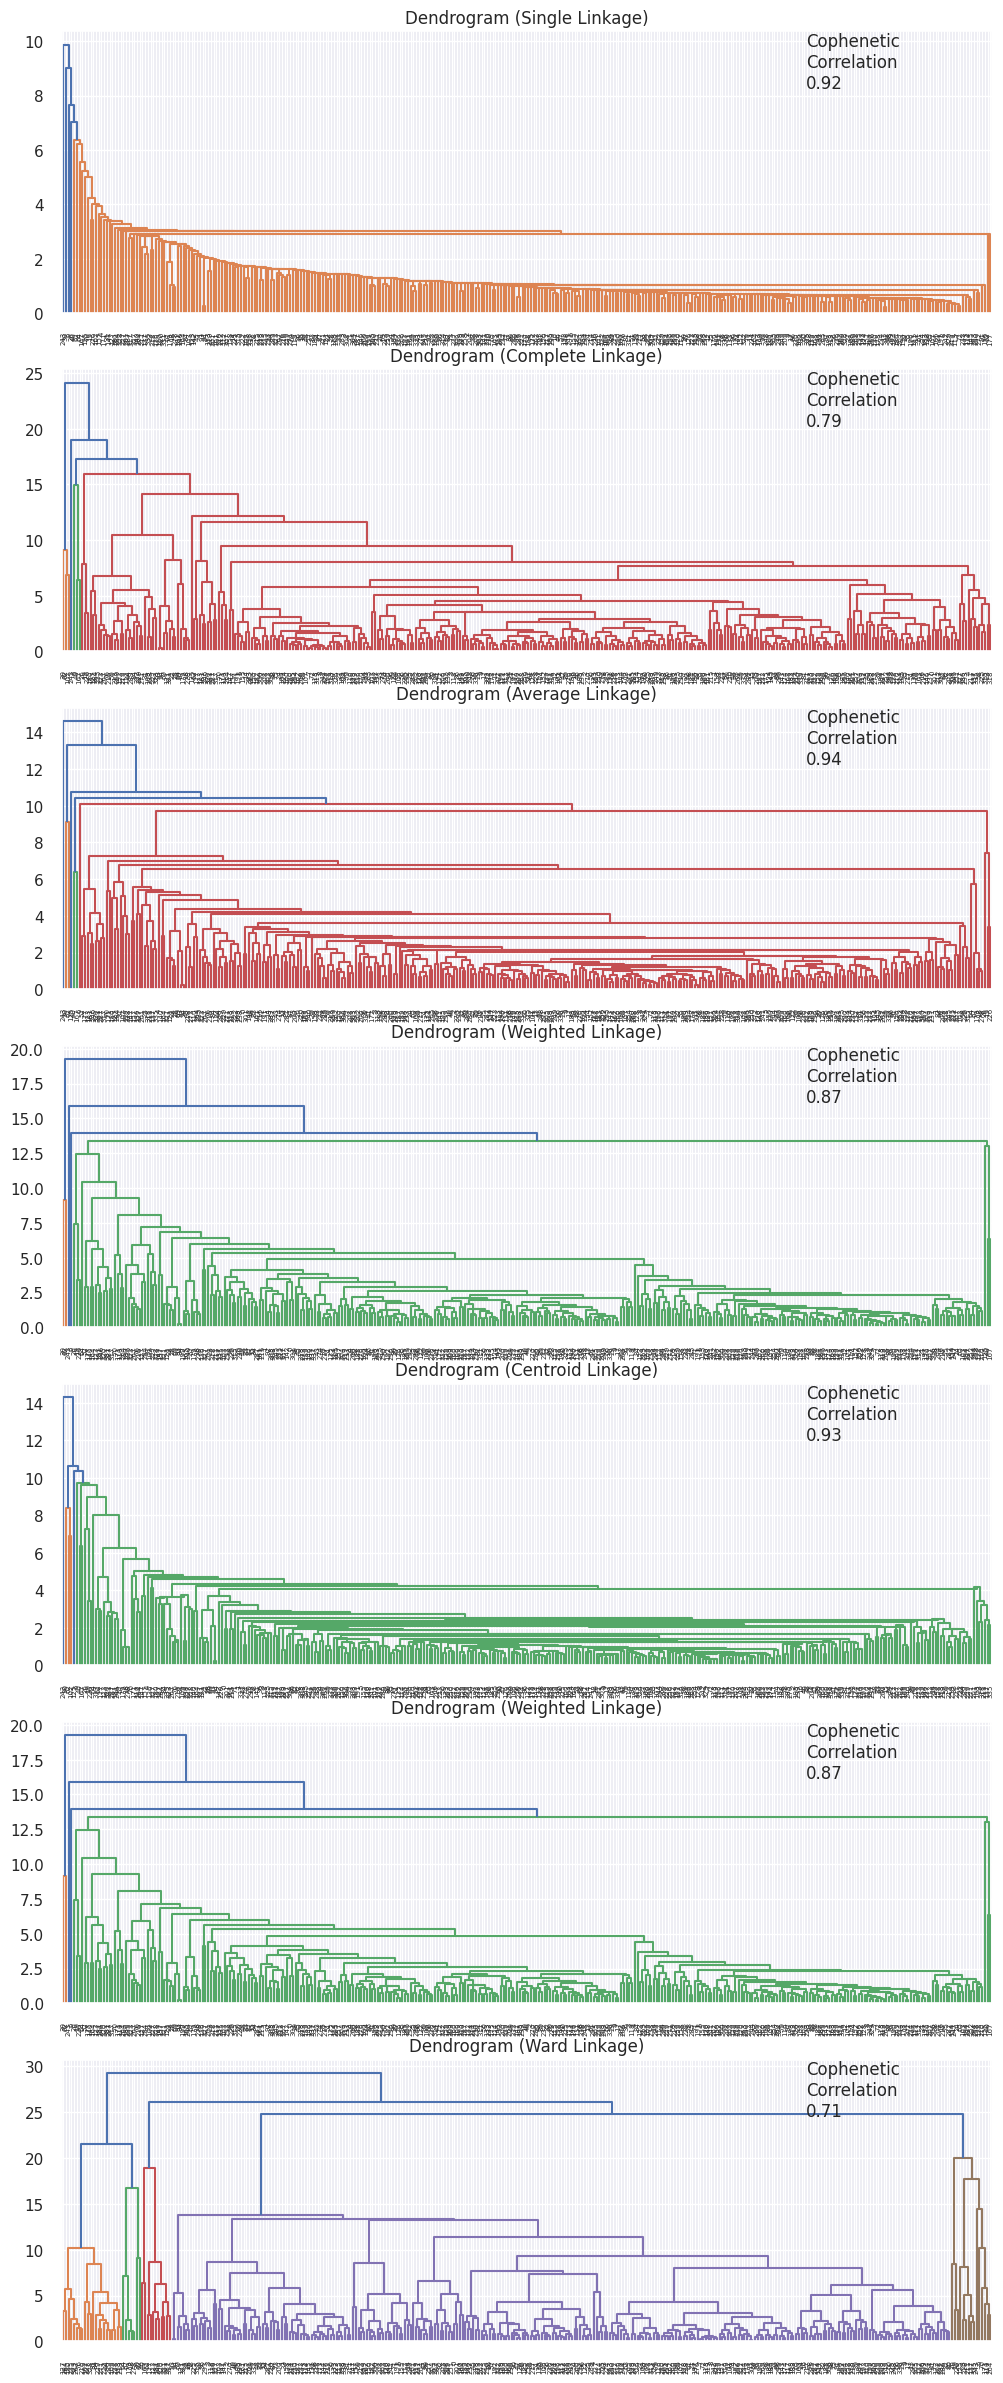

In [ ]:
# list of linkage methods
linkage_methods=["single", "complete","average","weighted","centroid", "weighted","ward"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkages","Cophenetic Coefficient"]
compare = []

# to create a supbplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(12, 30))
# we will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
  Z = linkage(hc_df, metric = "euclidean", method=method)

  dendrogram(Z, ax=axs[i])
  axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")
  coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
  axs[i].annotate(
      f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
       (0.80, 0.80),
       xycoords="axes fraction",
       )



* The Average linkage method has the highest cophenetic correlation so we will move ahead with it.
* 6 seems to be the appropriate number of clusters from the dendrogram for average linkage

## Creating Model using sklearn

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="average")
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=6)

In [ ]:
# creating a copy of the original data
df2 = df.copy()
# adding hierarchical clusters= labels to original and scaled data
hc_df["HC_Clusters"] = HCmodel.labels_
df2["HC_Clusters"]= HCmodel.labels_

## Cluster Profiling

In [ ]:
cluster_profile = df2.groupby("HC_Clusters").mean()

In [ ]:
cluster_profile["count_in_each_segments"] = (
    df2.groupby("HC_Clusters")["Security"].count().values
)

In [ ]:
# let's see the names of the companies in each cluster
for cl in df2["HC_Clusters"].unique():
  print("In cluster{}, the following companies are present:".format(cl))
  print(df2[df2["HC_Clusters"]==cl]["Security"].unique())
  print("-"*100, "\n")

In cluster0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Alexion Pharmaceuticals' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Amgen Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.'
 'Aon plc' 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball C

Obsevations
  * As we can see there are 3 clusters of 1 company, 2 clusters of 2 companies and all remaining companies are grouped into aother cluster. This clustering does not look good as the clusters do not have enough variablity

  
  * Let's us try using the ward linkage as it appears to have more distinct and separated clusters from it dendrogram. 5 clusters appears to be the appropriate number of clusters from the dendrogram for Ward linkage

## Creating Final Model

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [ ]:
# adding hierarchical clusters= labels to original and scaled data
hc_df["HC_Clusters"] = HCmodel.labels_
df2["HC_Clusters"]= HCmodel.labels_

### Cluster Profiling

In [ ]:
hc_cluster_profile = df2.groupby("HC_Clusters").mean()

In [ ]:
hc_cluster_profile["count_in_each_segments"] = (
    df2.groupby("HC_Clusters")["Security"].count().values
)

In [ ]:
# let's see the names of the companies in each cluster
for cl in df2["HC_Clusters"].unique():
  print("In cluster{}, the following companies are present:".format(cl))
  print(df2[df2["HC_Clusters"]==cl]["Security"].unique())
  print("-"*100, "\n")

In cluster3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'American Water Works Company Inc'
 'American Express Co' 'Boeing Company' 'Baxter International Inc.'
 'BB&T Corporation' 'Bard (C.R.) Inc.' 'BIOGEN IDEC Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle International Corp.'
 '

#### Now the clusters seem to have more variability

In [ ]:
df2.groupby(["HC_Clusters", "GICS Sector"])["Security"].count()

HC_Clusters  GICS Sector                
0            Consumer Discretionary          5
             Consumer Staples                1
             Financials                      1
             Health Care                     8
             Information Technology          9
             Materials                       1
             Real Estate                     1
             Telecommunications Services     1
1            Consumer Discretionary          1
             Consumer Staples                2
             Energy                          2
             Financials                      1
             Industrials                     1
2            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     1
             Telecommunications Services     2
3            Consumer Discretionary         33
             Consum

In [ ]:
hc_cluster_profile.style.highlight_max(color='Red', axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,213.518640,15.252913,1.779861,22.333333,258.740741,1504052814.814815,1716529851.851852,5.177407,689838338.441482,78.441603,13.022590,27
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,7
2,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
3,72.421687,4.563230,1.403434,25.218182,55.014545,72801872.727273,1572467469.090909,3.728564,445003946.148764,24.188244,-2.966949,275
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,22


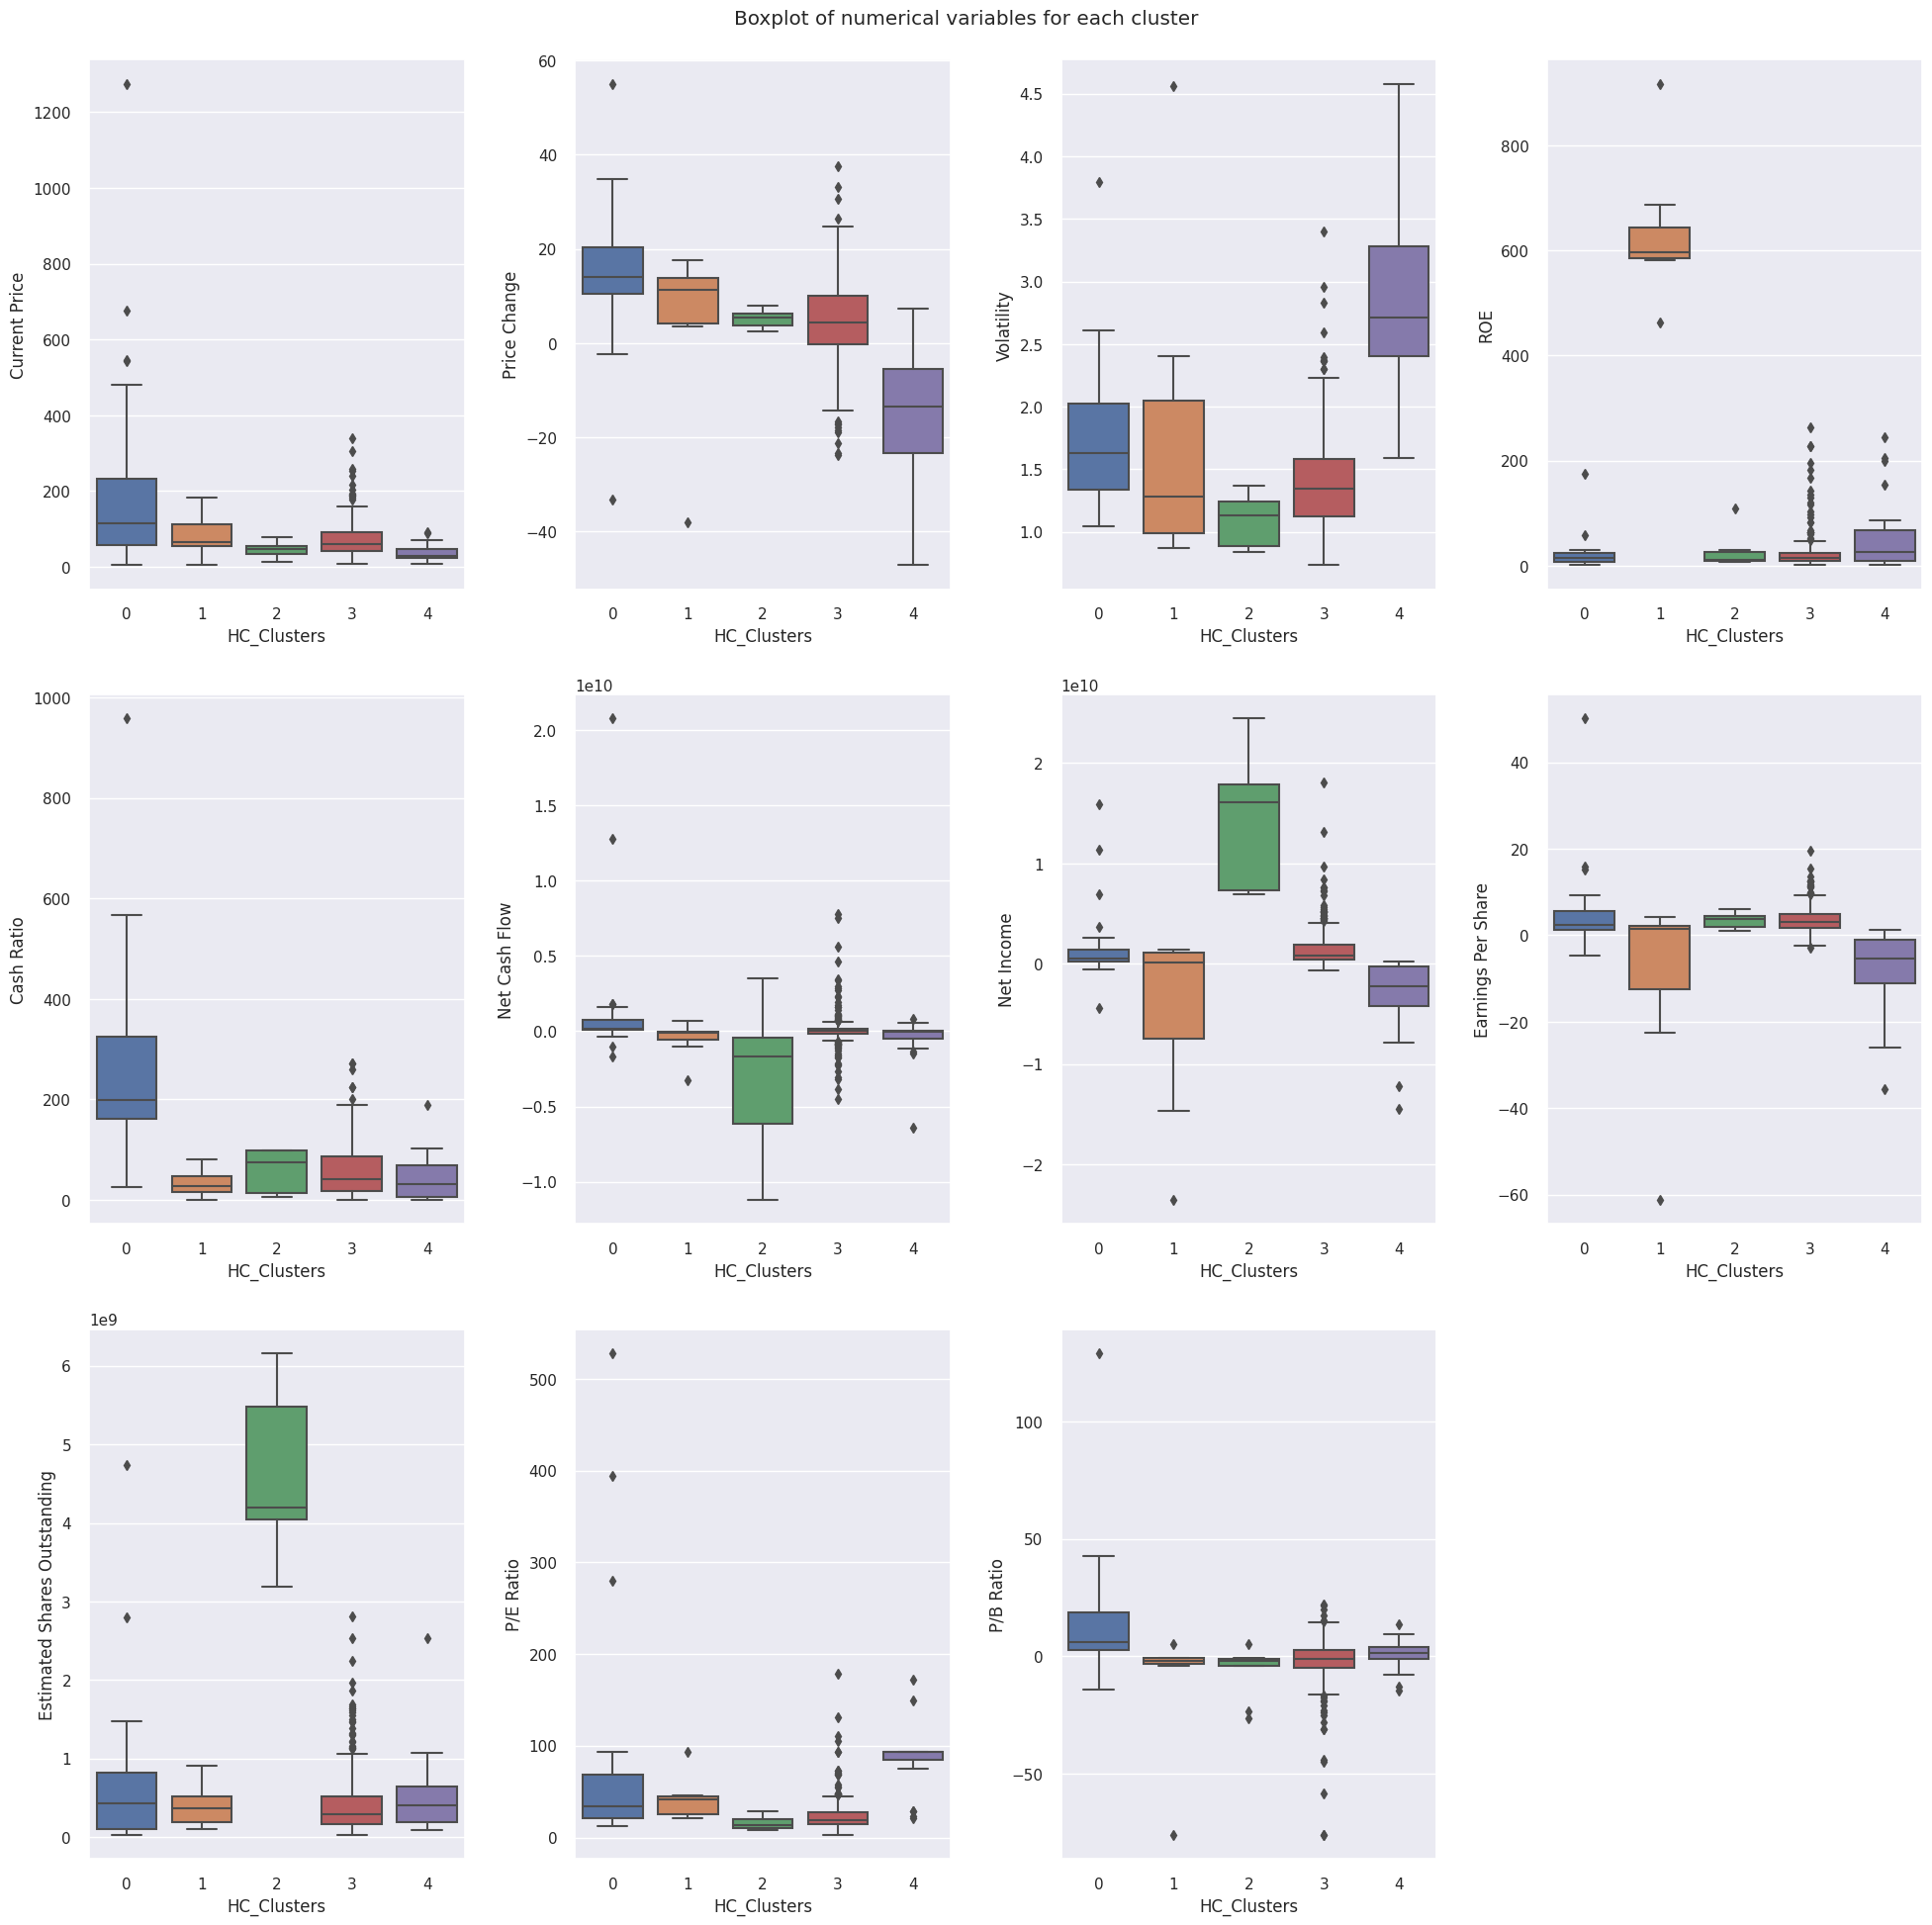

In [ ]:
plt.figure(figsize=(20,20))
plt.suptitle("Boxplot of numerical variables for each cluster")
for i, variable in enumerate(num_col):
  plt.subplot(3, 4, i + 1)
  sns.boxplot(data=df2, x= "HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

## Insight
* Cluster 0
 * There are 27 companies in this cluster.
 * ROE is low for companies in this cluster whiles net income, P/E ratio and Estimated shares outstanding are moderate.
  * Current price, price change, cash ratio, net cash flow, earnings per share and P/B ratio are High for this cluster.
  * Volatility on the other hand is moderate to high.

* Cluster 1
  * There are 7 companies in this cluster.
  * Cash ratio, net cash flow, net income, earnings per share, estimated shares outstanding and P/B ratio  are low in this cluster.
 * P/E ratio is moderate, current price and Volatility is moderate to high whiles ROE is high for companies in this clusters.

* Cluster 2
  * There are 9 companies in this cluster
  *  Net cash flow, P/E  and P/B ratios are low is cluster whiles ROE, Earning per share and Estimated Shares Outstanding are low to moderate.
  * Current price, price changes and volatility are moderate while Cash ratio is moderate to high.
  * Net Income for this cluster is high.

* Cluster 3
  * There are 275 companies in this cluster
  * Current price, price change, cash ratio net cash flow and earnings per share are moderate for this cluster.
  * ROE, volatility, Estimated outstanding share and  P/E ratio are low to moderate.
  * P/B ratio on other hand is low for the this cluster

* Cluster 4.
  * There are 22 companies in this cluster
  * Current price, price change, cash ratio, net cash flow, net income and earnings per share are all low for this cluster
  * P/B ratio and Estimated shares outstanding are low to moderate, ROE is moderate whiles Volatility is high for this cluster.


## K-means vs Hierarchical Clustering

You compare several things, like:
- In terms of excution time, K-means was much faster than Hierarchical Clustering
- Hierarchical Clustering with with 5 number of clusters gave a more distict and separated clusters.
- Clusters 0, K-means was 270 observation whiles HC clustering was 27. Cluster 1 recorded 11 and 7 for K-means and HC clustering respectively. Cluster 2 recorded 24 for K-means and 9 for HC clustering. Cluster 3 was 6 for K-means and 275 for HC clustering. Cluster 4 recorded 2 for K-means and 22 or HC clustering.
HC is did not have a fifth cluster but K-means had with 27 obervations.

- 5 is considered an appropriate number of clusters for HC clustering while 6 was appropriat for K-means.


## Actionable Insights and Recommendations
* Economic sector with the highest P/E ratio is Energy sector, this followed by Real Estate and Information Technology.
* The Economic sector with the highest cash ratio is Information Technology, followed by Telecommunications Services and Health care.
* The economic sectors with the highest Price Change is Health Care, this is followed by Consumer Staples and Information Technology.
* Top three Sectors with most securities are Industrials,  followed by Financials sector and Health Care.
* Top 5 sub industries are Oil & Gas Exploration & Production,
REITs,  Industrial Conglomerates, Electric Utilities  and Internet
Software & Services
* Stock portfolio from sectors in clusters 3 of Hierarchical clustering will guarentee  a higher retuns on majoirty of  the indicators since it contains a good number  of Energy, Real estates, Information Technology, Telecommunication and Health care Securities.

